In [ ]:
def smape(A, F):
    return 100/len(A) * sum(2 * abs(F - A) / (abs(A) + abs(F)))

In [ ]:
from sklearn.utils import check_arrays
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
dicplotsnpy='../../venv/MyBayesian/plots/'
dicplotsnpy2='../../venv/MyBayesian/plots-2/'
dicplotsnpy3='../../venv/MyBayesian/plots-3/'
dicplotsnpy4='../../venv/MyBayesian/plots-4/'
dicplotsnpyBXY='../../venv/MyBayesian/BangXYBaetorch/plots/'

In [33]:
# UNSW
attack_types=['Normal','Shellcode','Exploits','Fuzzers','Reconnaissance','Generic','Worms','Analysis','DoS','Backdoors','AllAttacks']

In [2]:
# CIC2017
# for plot
attack_types2=["BENIGN","FTP-Patator", "SSH-Patator","DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris", "Heartbleed", 
                  "Brute Force","XSS", "Sql Injection", "Infiltration","Bot", "DDoS", "PortScan","AllAttack"] # "Web Attack ?Brute Force"

 # dictionary 
attack_types={0:"BENIGN",1:"FTP-Patator", 2:"SSH-Patator", 3:"DoS GoldenEye", 4:"DoS Hulk", 5:"DoS Slowhttptest", 6:"DoS slowloris", 7:"Heartbleed", 
                 8:"Web Attack � Brute Force", 9:"Web Attack � XSS", 10:"Web Attack � Sql Injection", 11:"Infiltration",12:"Bot", 13:"DDoS", 14:"PortScan",15:"AllAttack"} # "Web Attack ?Brute Force"

# calculate part metrics

In [ ]:
pd_reader=pd.read_csv('../../venv/MyBayesian/plots-2/BAE+allmetrics-unsw-drop-latent-(5).csv' )  #,skiprows=251)

# plot comparision in different phase of each type
total_auc=0 # average of the largest AUC of each types
modelname='BAE MCdropout'
tw_auc,tw_accu=0,0
avg_auc,avg_accu,avg_macro=0,0,0
model_part={}
model_part['label']=["avgAUC","avgAccu","avgMacro"]
model_dict_total={}
model_dict_total["metricname"]=pd_reader.iloc[17,1:19]
for each in range(1,len( attack_types)):
    fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(1,4,figsize=(14,2.5),sharey=True) 
    fig.suptitle(attack_types[each] ,x=-0.05,y=0.5) # {typename} {modelname}')
    best_auc=0
    w_auc=0  #average
    w_accu=0  # average
    for i in range(1,len(pd_reader)):#,18*3
        if '+' in pd_reader.iloc[i,0] :
            
            if pd_reader.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
                legendd=pd_reader.iloc[i,0].split('+')[0]                   
                    
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_reader.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_reader.iloc[i+15,1:].astype(np.float16)

                plot_title=pd_reader.iloc[i+2,0]            
                y_values=pd_reader.iloc[i+3,1:].astype(np.float16)  # AUC
                y_accu=pd_reader.iloc[i+9,1:].astype(np.float16) 
                y_macro=pd_reader.iloc[i+11,1:].astype(np.float16)
               
                y_uncer=np.absolute(y_uncer)
                party_auc=y_values
                party_accu=y_accu
                party_macro=y_macro
                partx_auc, partx_accu, partx_macro=xx,xx,xx
                partuncer_auc, partuncer_accu, partuncer_macro=y_uncer,y_uncer, y_uncer
                   # for remove angles
                for ind in range(2,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        party_auc=y_values[:(ind-1)]                        
                        partx_auc=xx[:(ind-1)]
                        partuncer_auc=y_uncer[:(ind-1)]
                        break
                for ind in range(2,len(y_accu)):
                    if np.abs((y_accu[ind-1]-y_accu[ind]))>0.6:
                        party_accu=y_accu[:(ind-1)]                        
                        partx_accu=xx[:(ind-1)]
                        partuncer_accu=y_uncer[:(ind-1)]
                        break
                for ind in range(2,len(y_macro)):
                    if np.abs((y_macro[ind-1]-y_macro[ind]))>0.6:
                        party_macro=y_macro[:,(ind-1)]                        
                        partx_macro=xx[:,(ind-1)]
                        partuncer_macro=y_uncer[:,(ind-1)]
                        break
                        
                # AUC
                ax1.plot(partx_auc,party_auc,label=legendd)                
                ax1.fill_between(partx_auc,party_auc-partuncer_auc, party_auc+partuncer_auc,alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')              
                # ACCU
                ax2.plot(partx_accu,party_accu)
                ax2.fill_between(partx_accu, party_accu-partuncer_accu, party_accu+partuncer_accu, alpha=0.3, facecolor='grey' ) # , 'tab:green')                
                # FPR
                ax3.plot(xx, pd_reader.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                
                # Macro F1
                ax4.plot(partx_macro,party_macro)
                ax4.fill_between(partx_macro, party_macro-partuncer_macro, party_macro+partuncer_macro, alpha=0.3,facecolor='grey' ) # , 'tab:red') 
                
                #ax4.plot(xx,pd_reader.iloc[i+5,1:].astype(np.float16),label=legendd)  #GSS for test
                
                if each==1:
                    ax1.set_title(plot_title)
                    ax2.set_title(pd_reader.iloc[i+8,0]) 
                    ax3.set_title(pd_reader.iloc[i+6,0])
                    ax4.set_title(pd_reader.iloc[i+10,0]) 
                if each==len(attack_types)-1:
                    ax1.set(xlabel='Rejection')
                    ax2.set(xlabel='Rejection')
                    ax3.set(xlabel='Rejection')
                    ax4.set(xlabel='Rejection')
                              
                if legendd in model_dict_total.keys():
                    model_dict_total[legendd]=(model_dict_total[legendd]+pd_reader.iloc[i+17,1:19].astype(np.float16))/2.0      
                    
                    model_part[legendd+"part"]=np.average([model_part[legendd+"part"], [np.mean(party_auc),np.mean(party_accu),np.mean(party_macro)]],axis=0)
                    #print(model_part["part"])
                else: 
                    model_dict_total[legendd]=pd_reader.iloc[i+17,1:19].astype(np.float16) 
                    model_part[legendd+"part"]=[np.mean(party_auc),np.mean(party_accu),np.mean(party_macro)]
                
                #i=i+18 
                i=i+18*3
   
    
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1.03,0.4))
           
    for ax in fig.get_axes():
        ax.label_outer()
        ax.set_xlim(0,60)
        ax.set_ylim(0,1)
   
    pyplot.show()
    
         
save_path = "plots-2/"+'allmetrics'+".csv"

save_data=pd.DataFrame(model_dict_total)
save_data.to_csv(save_path, mode='a', header=True, index_label=modelname,index=True)
save_data=pd.DataFrame(model_part)
save_data.to_csv(save_path, mode='a', header=True, index_label=modelname,index=True)

# scatter map-gain value

### gain of VI and Drop

In [89]:
gainsvifiles=[]
gainsdropfiles=[]
gainsdrop=[]
gainsvi=[]
for root,dirs,files in os.walk(dicplotsnpy):
    for each in files:
        if (dicplotsnpy+each).endswith('.csv') and 'checkpoint' not in each:        
            #if !each.contains('+') and each.split('-')[1]=='unsw':
            if '+' not in each and  'unsw' in each: 
                if 'vi' in each:
                    pd_reader=pd.read_csv(dicplotsnpy+each,header=0 ,index_col=1)
                    #pd_reader.GaussianGustom.loc['gainaccu']
                    #gains.append(
                    aa=pd_reader.loc['gainaccu','GaussianCustom']
                    try:
                        if len(aa)>1 :
                            for vv in aa.values:
                                if not vv is None:
                                    gainsvi.append(float(vv))
                                    gainsvifiles.append(each) 

                    except:
                        if not aa is None:
                            gainsvi.append(float(aa))
                            gainsvifiles.append(each)  
                elif 'drop' in each:
                    pd_reader=pd.read_csv(dicplotsnpy+each,header=0 ,index_col=1)
                    #pd_reader.GaussianGustom.loc['gainaccu']
                    #gains.append(
                    aa=pd_reader.loc['gainaccu','GaussianCustom']
                    try:
                        if len(aa)>1 :
                            for vv in aa.values:
                                if not vv is None:
                                    gainsdrop.append(float(vv))
                                    gainsdropfiles.append(each) 

                    except:
                        if not aa is None:
                            gainsdrop.append(float(aa))
                            gainsdropfiles.append(each)  


/home/tengfei/venv/tensorflow/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


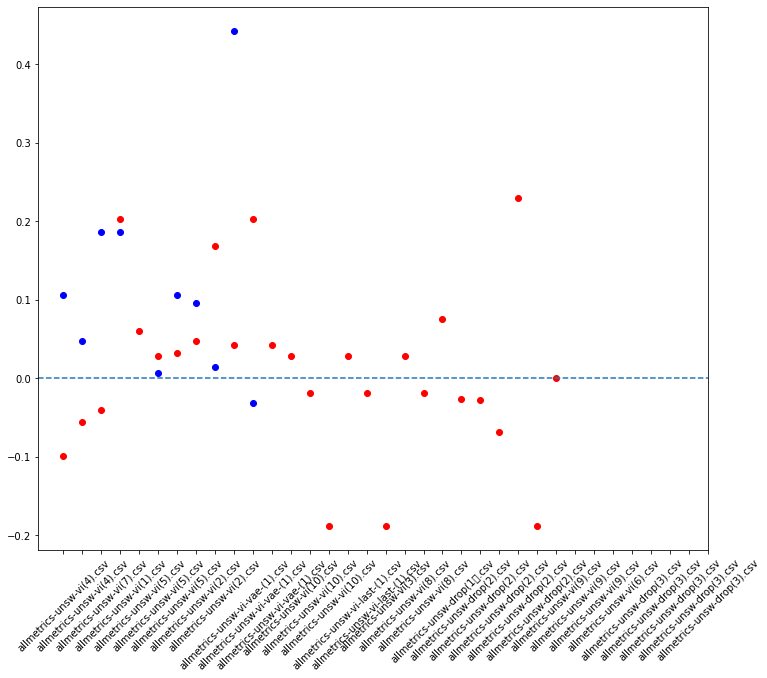

In [90]:
# plot map
xvi = range(len(gainsvifiles))
xdrop=range(len(gainsdropfiles))
vi=np.array(gainsvi)
drop=np.array(gainsdrop)

pyplot.figure(figsize=(12,10))
#pyplot.errbar(x,gains,yerr=0.2,fmt='ob',linestype='None',capsize=3)
pyplot.scatter(xvi,vi,color='r',label='BAE-VI') 
pyplot.scatter(xdrop,drop, color='b',label='BAE-Dropout')
pyplot.axhline(y=0,linestyle='--') 
pyplot.xticks(x, gainfiles, rotation=45)

pyplot.show()

In [ ]:
'''
to extract data about CIC-IDS-2017. but there is not 'gainaccu' in csv records.
'''
gainsvifiles=[]
gainsdropfiles=[]
gainsdrop=[]
gainsvi=[]
for root,dirs,files in os.walk(dicplotsnpy):
    for each in files:
        if (dicplotsnpy+each).endswith('.csv') and 'checkpoint' not in each:        
            #if !each.contains('+') and each.split('-')[1]=='unsw':
            if '+' not in each and  'unsw' not in each: 
                print(each)
                pd_reader=pd.read_csv(dicplotsnpy+each,header=0 ,index_col=1)
                    #pd_reader.GaussianGustom.loc['gainaccu']
                    #gains.append(
                aa=pd_reader.loc['gainaccu','GaussianCustom']
                try:
                    if len(aa)>1 :
                        for vv in aa.values:
                            if not vv is None:
                                gainsvi.append(float(vv))
                                gainsvifiles.append(each) 

                except:
                    if not aa is None:
                        gainsvi.append(float(aa))
                        gainsvifiles.append(each)  

### gain of last,latent,homo

#### UNSW

In [34]:
def plotscatter4(datalist):
    num=len(datalist)
    xx=range(0,len(datalist[0][0]))
    titles=['Homo','Last Layer','Latent Layer','BVAE']
    fig, axes = pyplot.subplots(nrows=1, ncols=num, figsize=(24, 4),sharey=True)
    for ind in range(0,num):
        axes[ind].scatter(xx,datalist[ind][0],color='g',marker='^',s=170,label='Total')  
        axes[ind].scatter(xx,datalist[ind][1],color='b',marker='*',s=100,label='Aleatoric') 
        axes[ind].scatter(xx,datalist[ind][2], color='y',marker='o',label='Epistemic')     
        axes[ind].set_title(titles[ind])
    # adding horizontal grid lines
    for ax in axes:
        #ax.yaxis.grid(True)
        ax.set_xticks(range(1,len(attack_types)))
        ax.set_xticklabels(ax.get_xticks(),rotation=45)
        ax.set_xlabel('Attack Types')
        ax.set_ylabel('Gain Value')   #  Accuracy') # 
        ax.set_xlim(0,len(attack_types))
        #ax.set_ylim(0,0.3)
        ax.label_outer()
        ax.axhline(y=0,linestyle='--') 
        ax.grid(axis='x',linestyle='--')

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right" , bbox_to_anchor=(0.9,1.1))
    # add x-tick labels
    pyplot.setp(axes, xticks=range(1,len(attack_types)),  xticklabels=attack_types[1:])
    pyplot.show()


In [35]:
def getGainOf3Alea(filenamelist,gainindex=8,metric='ECODLinear',gain=7):   #  ECODLinear   GaussianCustom  # Gamma # Gaussian1        
    allfilegain=[]
    for filename in filenamelist:
        filegain=[]
        gainstotal=[]
        gainsalea=[]
        gainsepis=[]
        gainindex=gain  # 6 ,7,8,9   # 6:gainavgaccu of avgaccu2    7:gainavgauc of avgauc    8:gainaccu of waccu    9:gainauc of wauc
        pd_reader=pd.read_csv(filename,header=0 ,index_col=1)
        for each in range(1,len( attack_types)):
            i=1
            while i<len(pd_reader):
                if '+' in pd_reader.iloc[i,0] :  
                    if pd_reader.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each] and pd_reader.iloc[i,0].split('+')[0] ==metric :
                        gainstotal.append(float( pd_reader.iloc[17+i,gainindex] ))                  
                        gainsalea.append( float(pd_reader.iloc[17+i+18,gainindex] )) 
                        gainsepis.append(float(pd_reader.iloc[17+i+18+18,gainindex]) )
                        i=i+18*3
                        continue
                i+=1
        filegain.append(gainstotal)
        filegain.append(gainsalea)
        filegain.append(gainsepis)
        allfilegain.append(filegain)
        
    return allfilegain
        

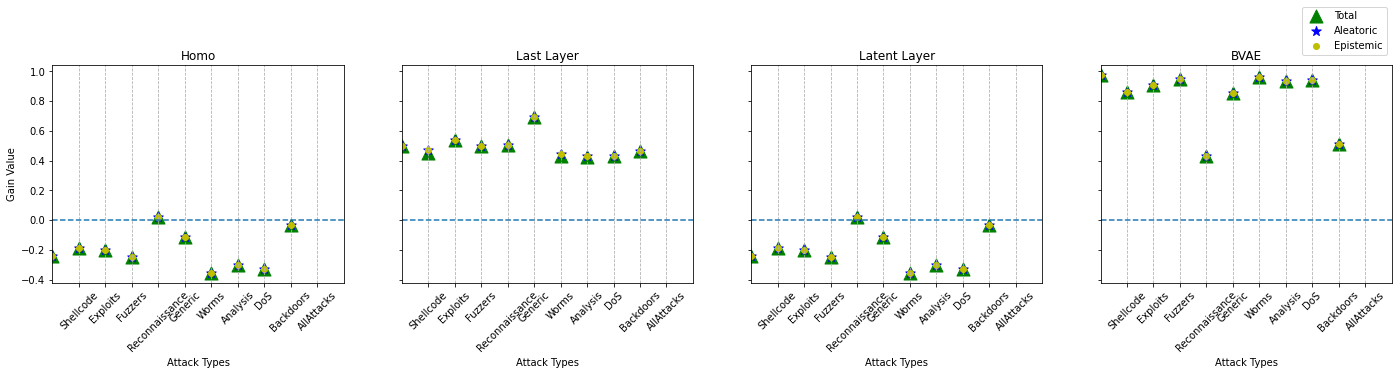

In [42]:
# Unsw dropout
'''
# 1
modellist=[]
modellist.append(dicplotsnpy3+'BAEunsw-drop-input-bce+allmetrics.csv')
modellist.append(dicplotsnpy3+'BAEunsw-drop-last-2+allmetrics.csv')
modellist.append(dicplotsnpy2+'BAE+allmetrics-unsw-drop-latent-(5).csv')
modellist.append(dicplotsnpy3+'BAEunsw-drop-vae-1+allmetrics.csv')
allgains=getGainOf3Alea(modellist, metric='ECODLinear', gain=9)      #     'GaussianCustom'
'''
plotscatter4(allgains)

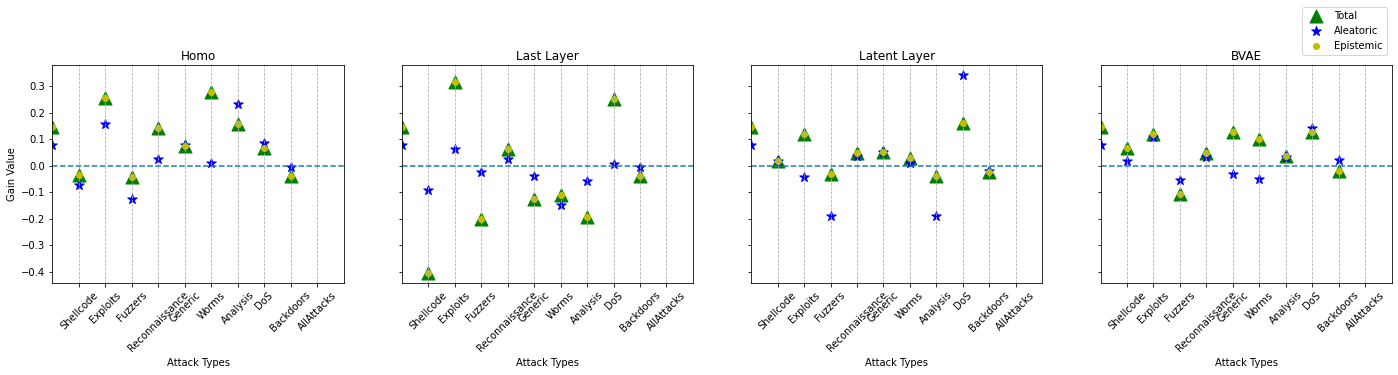

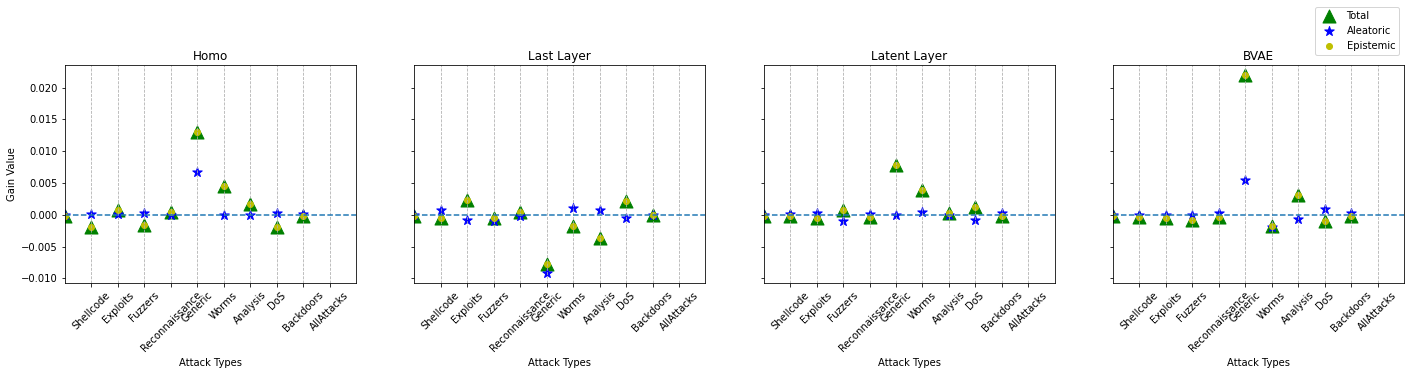

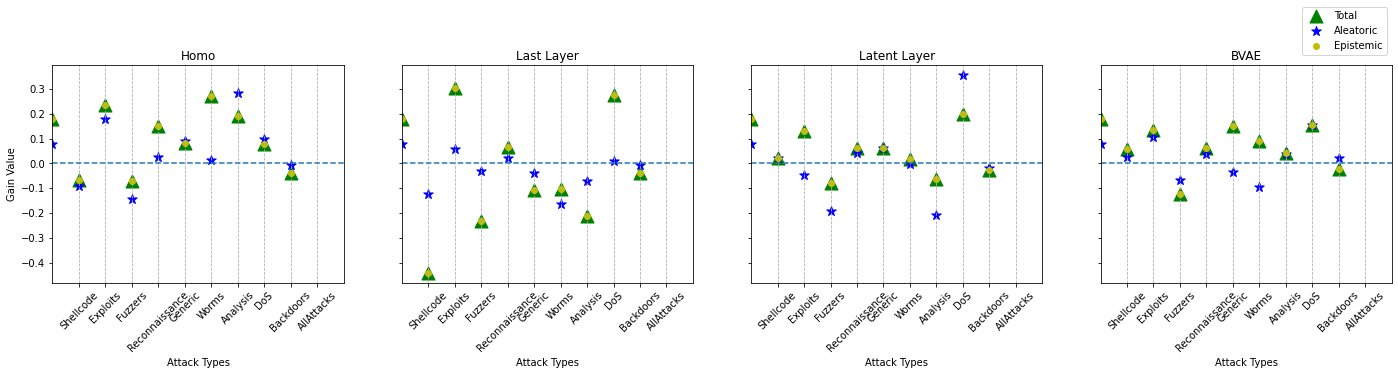

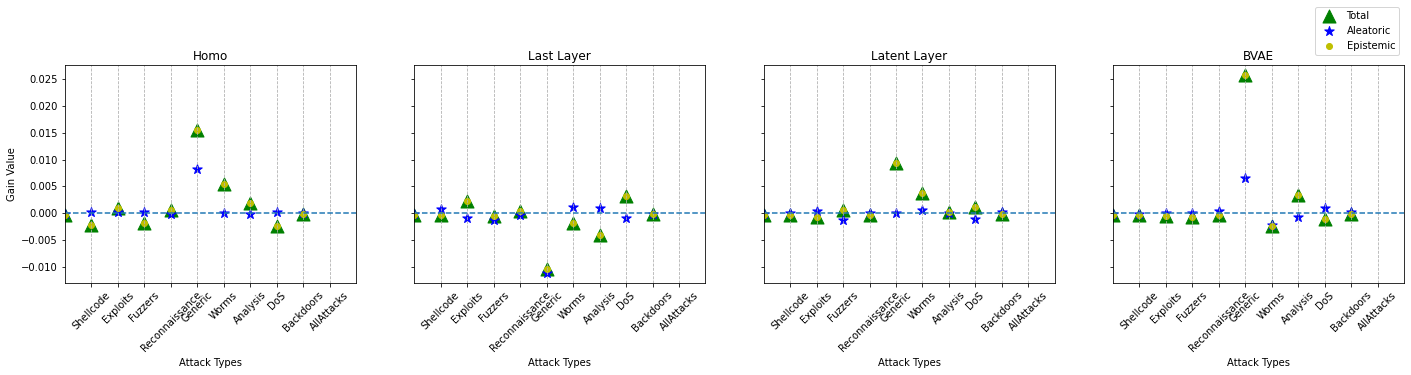

In [38]:
# Unsw dropout
'''
# 2    unsw2
modellist=[]
modellist.append(dicplotsnpy+'BAEunsw2-drop-input-bce+allmetrics.csv')
modellist.append(dicplotsnpy+'BAEunsw2-drop-last-norm-bce+allmetrics.csv')
modellist.append(dicplotsnpy+'BAEunsw2-drop-latent-mvn-mae+allmetrics.csv')
modellist.append(dicplotsnpy+'BAEunsw2-drop-vae-mvn-bce+allmetrics.csv')
#allgains=getGainOf3Alea(modellist)
'''

# 3 

modellist=[]
modellist.append(dicplotsnpy4+'BAEunsw-3-drop-input-bce+allmetrics.csv')
modellist.append(dicplotsnpy4+'BAEunsw-3-drop-last-bce+allmetrics.csv')
modellist.append(dicplotsnpy4+'BAEunsw-3-drop-latent-norm-bce+allmetrics.csv')
modellist.append(dicplotsnpy4+'BAEunsw-3-drop-vae-bce+allmetrics.csv')

'''
allgains1=getGainOf3Alea(modellist, metric='ECODLinear', gain=8)   # waccu   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains2=getGainOf3Alea(modellist, metric='ECODLinear', gain=9)   # wauc   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains3=getGainOf3Alea(modellist, metric='ECODLinear', gain=6)   # wavgaccu2   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains4=getGainOf3Alea(modellist, metric='ECODLinear', gain=7)   # wavgauc   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
'''
allgains1=getGainOf3Alea(modellist, metric='GaussianCustom', gain=8)   #  
allgains2=getGainOf3Alea(modellist, metric='GaussianCustom', gain=9)   #   
allgains3=getGainOf3Alea(modellist, metric='GaussianCustom', gain=6)   #  
allgains4=getGainOf3Alea(modellist, metric='GaussianCustom', gain=7)   # 
'''
# little good
allgains1=getGainOf3Alea(modellist, metric='Gaussian1', gain=8)   #   
allgains2=getGainOf3Alea(modellist, metric='Gaussian1', gain=9)   # 
allgains3=getGainOf3Alea(modellist, metric='Gaussian1', gain=6)   #   
allgains4=getGainOf3Alea(modellist, metric='Gaussian1', gain=7)   # 

# totally same
allgains1=getGainOf3Alea(modellist, metric='Gamma', gain=8)   #  
allgains2=getGainOf3Alea(modellist, metric='Gamma', gain=9)   #  
allgains3=getGainOf3Alea(modellist, metric='Gamma', gain=6)   #  
allgains4=getGainOf3Alea(modellist, metric='Gamma', gain=7)   # 
'''
plotscatter4(allgains1)
plotscatter4(allgains2)
plotscatter4(allgains3)
plotscatter4(allgains4)

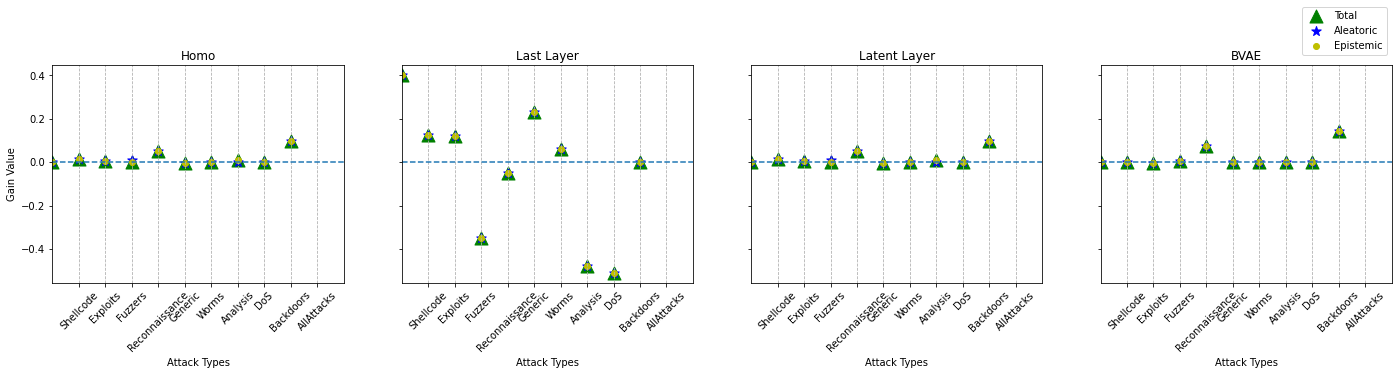

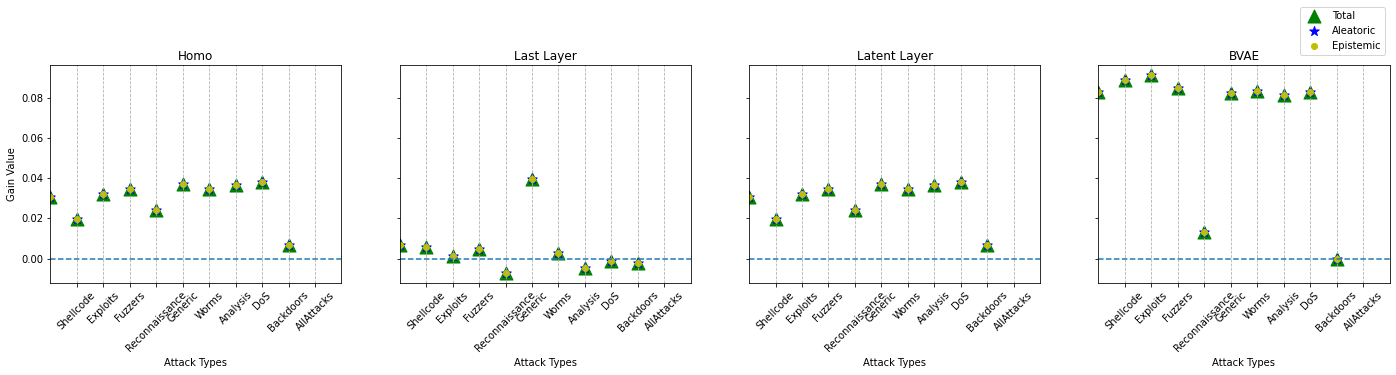

In [43]:
# Unsw vi
'''
# 1    
modellist=[]
#modellist.append(dicplotsnpy3+'BAEunsw2-vi-input-mvn-bce+allmetrics.csv')
modellist.append(dicplotsnpy3+'BAEunsw-vi-last-mvn-bce+allmetrics.csv')
modellist.append(dicplotsnpy3+'BAEunsw-vi-last-norm-mae+allmetrics.csv')
#modellist.append(dicplotsnpy3+'BAEunsw-vi-latent-mvn-bce+allmetrics.csv')
#modellist.append(dicplotsnpy3+'BAEunsw-vi-latent-mvn-mae+allmetrics.csv')
modellist.append(dicplotsnpy3+'BAEunsw-vi-latent-mvn-mse+allmetrics.csv')
modellist.append(dicplotsnpy3+'BAEunsw-vi-vae-mvn-bce+allmetrics.csv')
#allgains=getGainOf3Alea(modellist)
'''
# 2
modellist=[]
modellist.append(dicplotsnpy4+'BAEunsw-3-vi-latent-diag-bce+allmetrics.csv')
#modellist.append(dicplotsnpy4+'BAEunsw-3-vi-input-bce+allmetrics.csv')
modellist.append(dicplotsnpy4+'BAEunsw-3-vi-last-Tril-bce+allmetrics.csv')

#modellist.append(dicplotsnpy4+'BAEunsw-3-vi-latent-diag-bce+allmetrics-orig.csv')
modellist.append(dicplotsnpy4+'BAEunsw-3-vi-latent-diag-bce+allmetrics.csv')

#modellist.append(dicplotsnpy3+'BAEunsw-vi-vae-mvn-bce+allmetrics.csv')
#modellist.append(dicplotsnpy4+'BAEunsw-3-vi-vae-mvn-bce+allmetrics-mae.csv')
#modellist.append(dicplotsnpy4+'BAEunsw-3-vi-vae-mvn-bce+allmetrics.csv')
#modellist.append(dicplotsnpy4+'BAEunsw-3-vi-vae-mvn-bias-bce+allmetrics.csv')
#modellist.append(dicplotsnpy4+'BAEunsw-3-vi-vae-mvn0-bce+allmetrics.csv')
#modellist.append(dicplotsnpy4+'BAEunsw2-vi-vae-mvn-bce+allmetrics-dist.csv')
#modellist.append(dicplotsnpy4+'BAEunsw2-vi-vae-mvn-bce+allmetrics-nodist.csv')
#modellist.append(dicplotsnpy4+'BAEunsw2-vi-vae-mvn-bce+allmetrics-noscale.csv')
modellist.append(dicplotsnpy4+'BAEunsw2-vi-vae-mvn-bce+allmetrics-scale.csv')



allgains1=getGainOf3Alea(modellist, metric='ECODLinear', gain=8)   # waccu   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains2=getGainOf3Alea(modellist, metric='ECODLinear', gain=9)   # wauc   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains3=getGainOf3Alea(modellist, metric='ECODLinear', gain=6)   # wavgaccu2   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains4=getGainOf3Alea(modellist, metric='ECODLinear', gain=7)   # wavgauc   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
'''
allgains1=getGainOf3Alea(modellist, metric='GaussianCustom', gain=8)   #  
allgains2=getGainOf3Alea(modellist, metric='GaussianCustom', gain=9)   #   
#allgains3=getGainOf3Alea(modellist, metric='GaussianCustom', gain=6)   #  
#allgains4=getGainOf3Alea(modellist, metric='GaussianCustom', gain=7)   # 

allgains1=getGainOf3Alea(modellist, metric='Gaussian1', gain=8)   #   
allgains2=getGainOf3Alea(modellist, metric='Gaussian1', gain=9)   # 
allgains3=getGainOf3Alea(modellist, metric='Gaussian1', gain=6)   #   
allgains4=getGainOf3Alea(modellist, metric='Gaussian1', gain=7)   # 

allgains1=getGainOf3Alea(modellist, metric='Gamma', gain=8)   #  
allgains2=getGainOf3Alea(modellist, metric='Gamma', gain=9)   #  
allgains3=getGainOf3Alea(modellist, metric='Gamma', gain=6)   #  
allgains4=getGainOf3Alea(modellist, metric='Gamma', gain=7)   # 
'''
plotscatter4(allgains1)
plotscatter4(allgains2)
#plotscatter4(allgains3)
#plotscatter4(allgains4)

#### CIC2017

In [3]:
def plotscatter4(datalist):
    num=len(datalist)
    xx=range(1,len(datalist[0][0])  +1)
    titles=['Homo','Last Layer','Latent Layer','BVAE']
    fig, axes = pyplot.subplots(nrows=1, ncols=num, figsize=(24, 4),sharey=True)
    for ind in range(0,num):
        axes[ind].scatter(xx,datalist[ind][0],color='g',marker='^',s=170,label='Total')  
        axes[ind].scatter(xx,datalist[ind][1],color='b',marker='*',s=100,label='Aleatoric') 
        axes[ind].scatter(xx,datalist[ind][2], color='y',marker='o',label='Epistemic')     
        axes[ind].set_title(titles[ind])
    # adding horizontal grid lines
    for ax in axes:
        #ax.yaxis.grid(True)
        ax.set_xticks(range(1,len(attack_types2)))
        ax.set_xticklabels(ax.get_xticks(),rotation=45)
        ax.set_xlabel('Attack Types')
        ax.set_ylabel('Gain Value')   #  Accuracy') # 
        ax.set_xlim(0,len(attack_types2))
        #ax.set_ylim(0,0.3)
        ax.label_outer()
        ax.axhline(y=0,linestyle='--') 
        ax.grid(axis='x',linestyle='--')

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right" , bbox_to_anchor=(0.9,1.1))
    # add x-tick labels
    pyplot.setp(axes, xticks=range(1,len(attack_types2)),  xticklabels=attack_types2[1:])
    pyplot.show()


In [4]:
def getGainOf3Alea(filenamelist,gainindex=8,metric='ECODLinear',gain=7):   #  ECODLinear   GaussianCustom  # Gamma # Gaussian1        
    allfilegain=[]
    for filename in filenamelist:
        filegain=[]
        gainstotal=[]
        gainsalea=[]
        gainsepis=[]
        gainindex=gain  # 6 ,7,8,9   # 6:gainavgaccu of avgaccu2    7:gainavgauc of avgauc    8:gainaccu of waccu    9:gainauc of wauc
        pd_reader=pd.read_csv(filename,header=0 ,index_col=1)
        for each in range(1,len( attack_types)):
            i=1
            while i<len(pd_reader):
                if '+' in pd_reader.iloc[i,0] :  
                    if pd_reader.iloc[i,0].split('+')[1]==attack_types[each] and pd_reader.iloc[i,0].split('+')[0] ==metric :
                        gainstotal.append(float( pd_reader.iloc[17+i,gainindex] ))                  
                        gainsalea.append( float(pd_reader.iloc[17+i+18,gainindex] )) 
                        gainsepis.append(float(pd_reader.iloc[17+i+18+18,gainindex]) )
                        i=i+18*3
                        continue
                i+=1
        filegain.append(gainstotal)
        filegain.append(gainsalea)
        filegain.append(gainsepis)
        allfilegain.append(filegain)
        
    return allfilegain
        

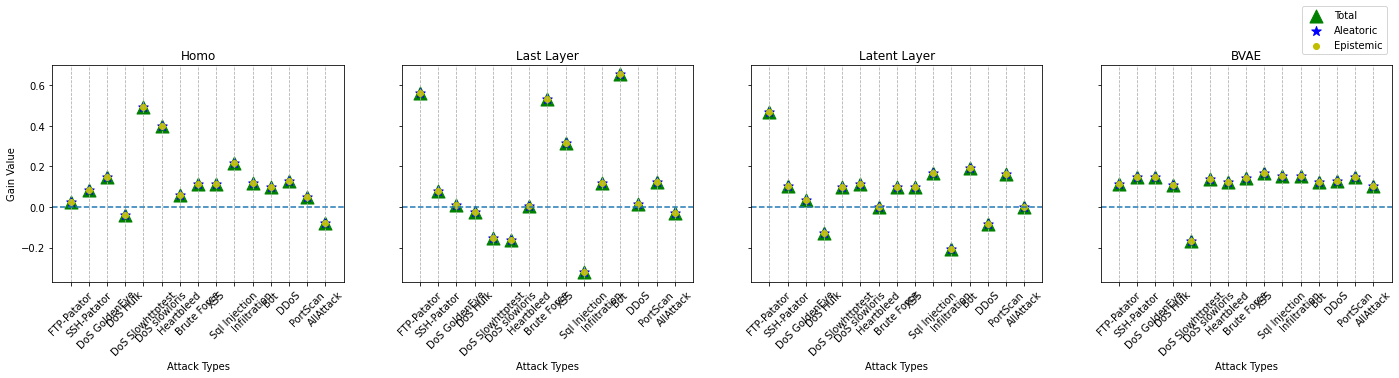

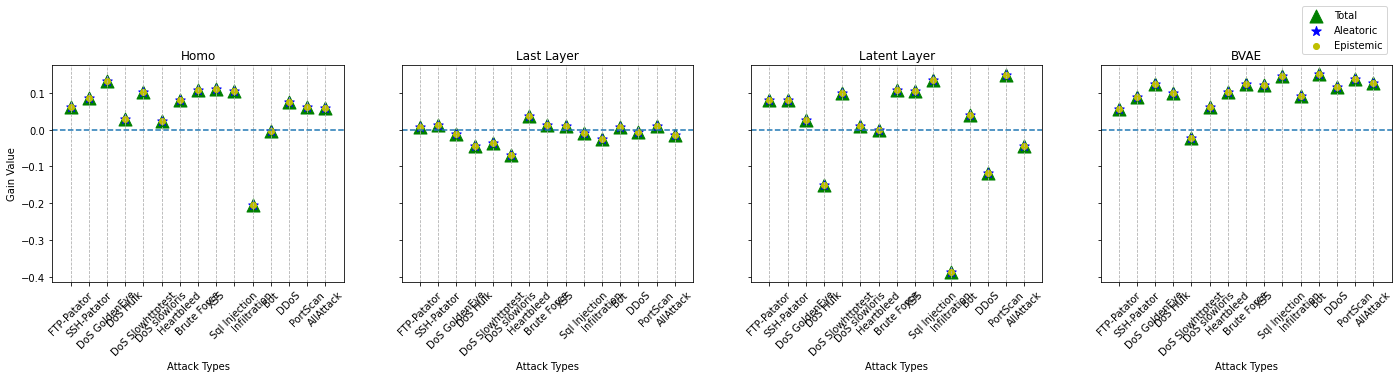

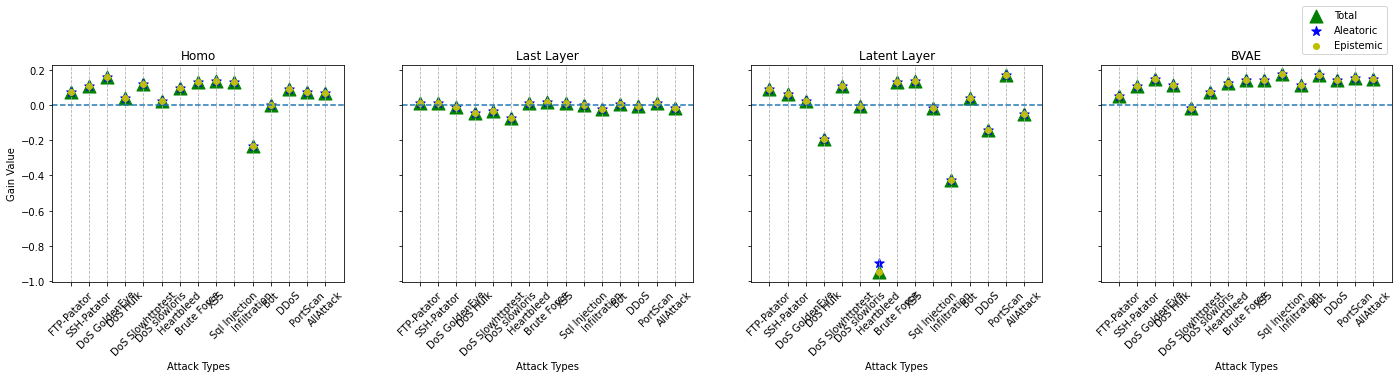

In [13]:
# CIC2017 dropout
'''
# 1
modellist=[]
modellist.append(dicplotsnpy3+'BAEcic2017-drop-input-bce+allmetrics.csv')
modellist.append(dicplotsnpy3+'BAEcic2017-drop-last-bce+allmetrics.csv')
modellist.append(dicplotsnpy3+'BAEcic2017-drop-latent-mae+allmetrics.csv')
modellist.append(dicplotsnpy3+'BAEcic2017-drop-vae-bce+allmetrics.csv')
allgains=getGainOf3Alea(modellist)

'''
# 3
modellist=[]
#modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-input-bce+allmetrics.csv')
modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-input-bce+allmetrics-1111.csv')

#modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-last-mvn-bce+allmetrics.csv')
modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-last-mvn-mae+allmetrics.csv')

#modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-latent-Tril-bce+allmetrics.csv')
modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-latent-Tril-bce+allmetrics111.csv')

#modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-vae-Tril-bce+allmetrics.csv')
#modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-vae-Tril-bce+allmetrics-111.csv')
#modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-vae-Tril-bce+allmetrics222.csv')
#modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-vae-Tril-bce+allmetrics333.csv')  ##############
#modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-vae-Tril-bce+allmetrics444.csv')
#modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-vae-Tril-bce+allmetrics555.csv')
#modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-vae-Tril-bce+allmetrics666.csv')
#modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-vae-Tril-mae+allmetrics.csv')
#modellist.append(dicplotsnpy4+'BAEcic2017-4-drop-vae-mvn-mae+allmetrics.csv')
modellist.append(dicplotsnpy4+'BAEcic2017-4-drop-vae-mvn-mae+allmetrics111.csv')


allgains1=getGainOf3Alea(modellist, metric='ECODLinear', gain=8)   # waccu   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains2=getGainOf3Alea(modellist, metric='ECODLinear', gain=9)   # wauc   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains3=getGainOf3Alea(modellist, metric='ECODLinear', gain=6)   # wavgaccu2   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains4=getGainOf3Alea(modellist, metric='ECODLinear', gain=7)   # wavgauc   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
'''
allgains1=getGainOf3Alea(modellist, metric='GaussianCustom', gain=8)   #  
allgains2=getGainOf3Alea(modellist, metric='GaussianCustom', gain=9)   #   
allgains3=getGainOf3Alea(modellist, metric='GaussianCustom', gain=6)   #  
allgains4=getGainOf3Alea(modellist, metric='GaussianCustom', gain=7)   # 

allgains1=getGainOf3Alea(modellist, metric='Gaussian1', gain=8)   #   
allgains2=getGainOf3Alea(modellist, metric='Gaussian1', gain=9)   # 
allgains3=getGainOf3Alea(modellist, metric='Gaussian1', gain=6)   #   
allgains4=getGainOf3Alea(modellist, metric='Gaussian1', gain=7)   # 

allgains1=getGainOf3Alea(modellist, metric='Gamma', gain=8)   #  
allgains2=getGainOf3Alea(modellist, metric='Gamma', gain=9)   #  
allgains3=getGainOf3Alea(modellist, metric='Gamma', gain=6)   #  
allgains4=getGainOf3Alea(modellist, metric='Gamma', gain=7)   # 
'''

plotscatter4(allgains1)
plotscatter4(allgains2)
#plotscatter4(allgains3)
plotscatter4(allgains4)

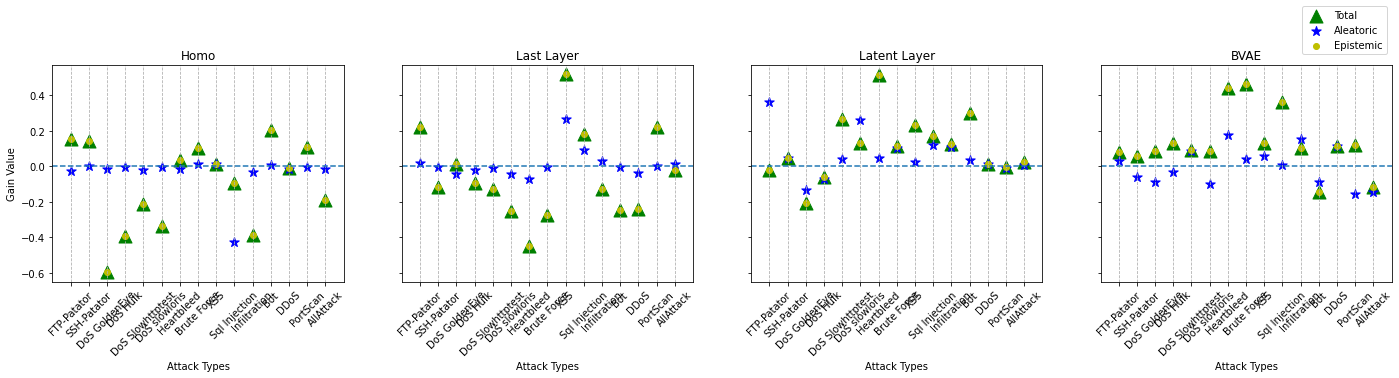

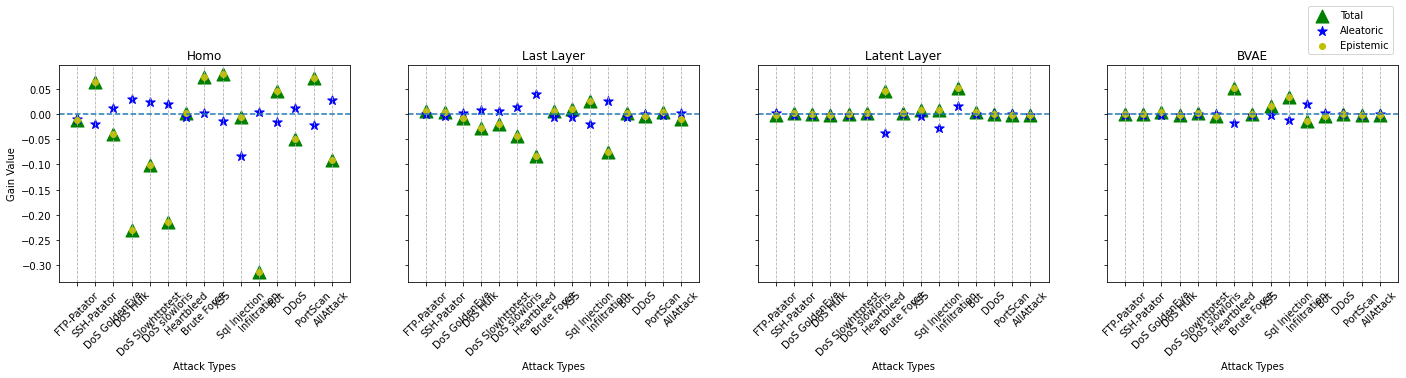

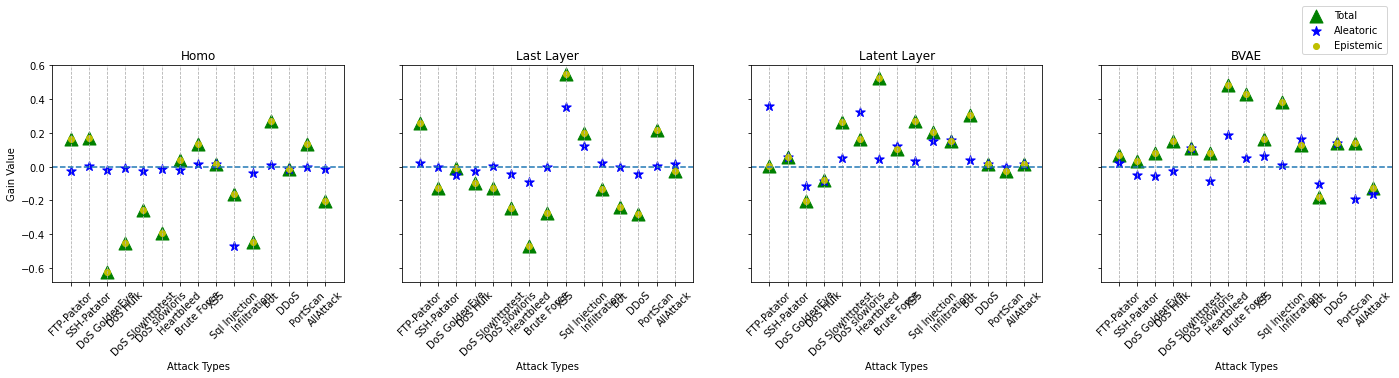

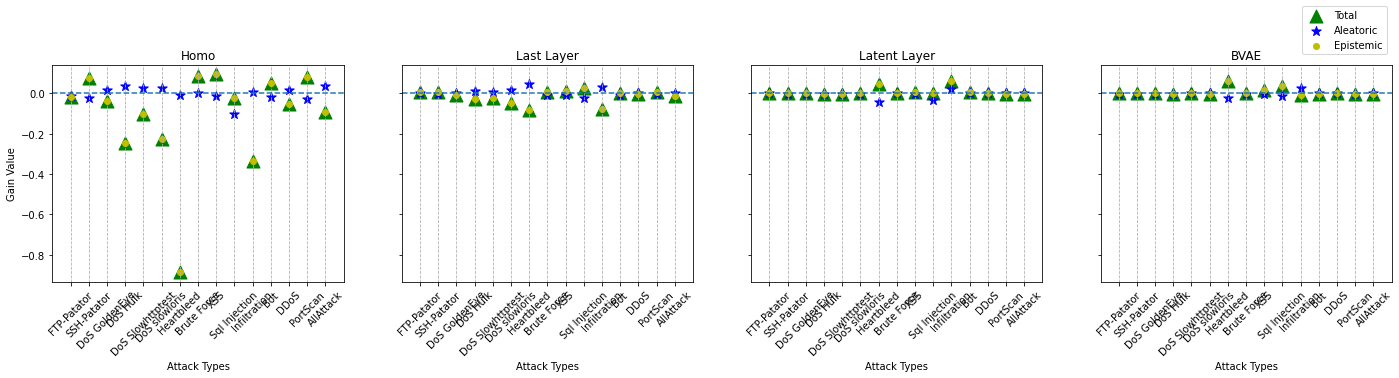

In [154]:
# CIC2017 vi
'''
# 1
modellist=[]
modellist.append(dicplotsnpy+'BAEcic2017-vi-input-mae+allmetrics.csv')
modellist.append(dicplotsnpy+'BAEcic2017-vi-last-bce+allmetrics.csv')
modellist.append(dicplotsnpy+'BAEcic2017-vi-latent-mae+allmetrics.csv')
modellist.append(dicplotsnpy+'BAEcic2017-vi-vae-bce+allmetrics.csv')
allgains=getGainOf3Alea(modellist)
'''

# 3

modellist=[]
modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-input-bce+allmetrics.csv')
#modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-input-norm-mae+allmetrics.csv')

#modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-last-mvn-mae+allmetrics-mae.csv')
#modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-last-mvn-mae+allmetrics.csv')
modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-last-norm-mae+allmetrics.csv')
#modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-last-norm-mae+allmetrics111.csv')    # have no Gamma


#modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-latent-mae+allmetrics.csv')    # have no Gamma
#modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-latent-mae+allmetrics1111.csv')  # have no Gamma
modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-latent-mae+allmetrics2222-predmae.csv')  # have no Gamma
# modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-latent-mvn-bce+allmetrics-rmse.csv')
# modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-latent-mvn-bce+allmetrics.csv')
# modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-latent-mvnTril-bce+allmetrics.csv')
# modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-latent-norm-bce+allmetrics.csv')


# modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-vae-mae+allmetrics-rmse.csv')   # have no Gamma
# modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-vae-mae+allmetrics.csv')       # have no Gamma
# modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-vae-mvnTril-bce+allmetrics111.csv')
#modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-vae-mvnTril-bce+allmetrics222.csv')
modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-vae-mvnTril-bce+allmetrics333.csv')
# modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-vae-mvnTril-bce+allmetrics555.csv')
# modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-vae-mvnTril-bce+allmetrics666.csv')
# modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-vae-mvnTril-bce+allmetrics777.csv')
# modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-vae-mvnTril-bce+allmetrics888.csv')
# modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-vae-norm-Tril-bce+allmetrics.csv')
# modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-vae-norm-Tril-bce+allmetrics111.csv')
# modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-vae-norm-Tril-bce+allmetrics222.csv')
#modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-vae-norm-Tril-bce+allmetrics333.csv')
#modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-vae-Tril-mse+allmetrics111.csv')
# modellist.append(dicplotsnpy4+'BAEcic2017-3-vi-vae-normTril-bce+allmetrics999.csv')

'''
allgains1=getGainOf3Alea(modellist, metric='ECODLinear', gain=8)   # waccu   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains2=getGainOf3Alea(modellist, metric='ECODLinear', gain=9)   # wauc   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains3=getGainOf3Alea(modellist, metric='ECODLinear', gain=6)   # wavgaccu2   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains4=getGainOf3Alea(modellist, metric='ECODLinear', gain=7)   # wavgauc   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
'''
allgains1=getGainOf3Alea(modellist, metric='GaussianCustom', gain=8)   #  
allgains2=getGainOf3Alea(modellist, metric='GaussianCustom', gain=9)   #   
allgains3=getGainOf3Alea(modellist, metric='GaussianCustom', gain=6)   #  
allgains4=getGainOf3Alea(modellist, metric='GaussianCustom', gain=7)   # 
'''
allgains1=getGainOf3Alea(modellist, metric='Gaussian1', gain=8)   #   
allgains2=getGainOf3Alea(modellist, metric='Gaussian1', gain=9)   # 
allgains3=getGainOf3Alea(modellist, metric='Gaussian1', gain=6)   #   
allgains4=getGainOf3Alea(modellist, metric='Gaussian1', gain=7)   # 

allgains1=getGainOf3Alea(modellist, metric='Gamma', gain=8)   #  
allgains2=getGainOf3Alea(modellist, metric='Gamma', gain=9)   #  
allgains3=getGainOf3Alea(modellist, metric='Gamma', gain=6)   #  
allgains4=getGainOf3Alea(modellist, metric='Gamma', gain=7)   # 
'''
plotscatter4(allgains1)
plotscatter4(allgains2)
plotscatter4(allgains3)
plotscatter4(allgains4)

In [ ]:

modellist=[]
modellist.append(dicplotsnpy+'BAEcic2017-5-vi-latent-mae+allmetrics.csv')
 
allgains1=getGainOf3Alea(modellist, metric='Gamma', gain=8)   # 
allgains2=getGainOf3Alea(modellist, metric='Gamma', gain=9)   # 

plotscatter4(allgains1)
plotscatter4(allgains2)

In [19]:
# 1.compare 3 uncertainty in one model
modelfilename='BAEcic2017-5-vi-latent-mae+allmetrics.csv'   #  'BAEmcdropout_UNSW-NB15_L64_gaussian_none_wd1-allmetrics.csv' dicplotsnpy3
gainstotal=[]
gainsalea=[]
gainsepis=[]
gainindex=8  #,7,8,9   # 6:gainavgaccu    7:gainavgauc    8:gainaccu    9:gainauc
metricname=  'GaussianCustom'   # 'Gaussian1'  #  'ECODLinear'   #  
pd_reader=pd.read_csv(dicplotsnpy+modelfilename,header=0 ,index_col=1)

for each in range(1,len( attack_types)):
    #i=109
    i=0
    while i<len(pd_reader):
        
    #for i in range(109,len(pd_reader)):    #,18*3
        if '+' in pd_reader.iloc[i,0] :          
            if pd_reader.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each] and pd_reader.iloc[i,0].split('+')[0] == metricname:
                
                gainstotal.append(float( pd_reader.iloc[17+i,gainindex] ))                  
                gainsalea.append( float(pd_reader.iloc[17+i+18,gainindex] )) 
                gainsepis.append(float(pd_reader.iloc[17+i+18+18,gainindex]) )
            i=i+18*3
            continue
        i+=1
                    

In [ ]:
# plot map
xx=range(0,len(gainstotal))
print(len(gainstotal))
#xx_a=range(0,len(gainsalea))
#xx_e=range(0,len(gainsepis))
pyplot.figure(figsize=(10,8))
#pyplot.errbar(x,gains,yerr=0.2,fmt='ob',linestype='None',capsize=3)
pyplot.scatter(xx,gainstotal,color='g',marker='^',s=170,label='Total') 
pyplot.scatter(xx,gainsalea, color='b',marker='*',s=100,label='Aleatoric')
pyplot.scatter(xx,gainsepis, color='y',marker='o',label='Epistemic')
pyplot.axhline(y=0,linestyle='--') 
pyplot.xticks(xx, attack_types2[1:], rotation=45)
pyplot.legend(loc='best')
pyplot.grid(axis='x',linestyle='--')
pyplot.show()

#### 3 alea in one model

In [64]:
# 2.compare 3 weighted metrics in multiple model
# in VI
vifilename='BAEunsw-vi-latent-mvn-bce+allmetricsSum.csv'
gainsvi=[]
for root,dirs,files in os.walk(dicplotsnpy):
    for each in files:
        if each==vifilename:
            pd_reader=pd.read_csv(dicplotsnpy+each,header=0 ,index_col=1)
            #aa=pd_reader.loc['gainaccu','GaussianCustom']
            #aa=pd_reader.loc['gainaccu','ECODLinear']
            #aa=pd_reader.loc['gainauc','ECODLinear']
            aa=pd_reader.loc['gainauc','GaussianCustom']
            try:
                if len(aa)>1 :
                    for vv in aa.values:
                        if not vv is None:
                            gainsvi.append(float(vv))
            except:
                if not aa is None:
                    gainsvi.append(float(aa)) 


# box map- uncertainty value

In [48]:
def plotbox3(data1,data2,data3):
    # plot box plot
    fig, axes = pyplot.subplots(nrows=1, ncols=3, figsize=(16, 4),sharey=True)
    # plot violin plot
    axes[0].boxplot(data1)
    axes[0].set_title('Total')
    axes[0].set_ylabel('Uncertainty')
    axes[1].boxplot(data2)
    axes[1].set_title('Aleatoric')
    axes[2].boxplot(data3)
    axes[2].set_title('Epistemic')

    # adding horizontal grid lines
    for ax in axes:
        #ax.yaxis.grid(True)
        ax.set_xticks(range(1,len(attack_types)))
        ax.set_xticklabels(ax.get_xticks(),rotation=45)
        ax.set_xlabel('Attack Types')
        #ax.set_ylabel('Uncertainty')    
        ax.set_xlim(0,11)
        #ax.set_ylim(0,0.3)

    # add x-tick labels
    pyplot.setp(axes, xticks=range(1,len(attack_types)),
             xticklabels=attack_types[1:])
    pyplot.show()


In [75]:
def plotviolin3(data1,data2,data3, mean=True, median=False):
    # plot violin ; couldn't plot directly in axes[i]
    fig, axes = pyplot.subplots(nrows=1, ncols=3, figsize=(16, 4),sharey=True) # -------16 for unsw; 20 for cic-------
    # plot violin plot
    parts=axes[0].violinplot(data1,showmeans=mean,showmedians=median)
    axes[0].set_title('Total')      
    axes[0].set_ylabel('Uncertainty')
    for pc in parts['bodies']:
        #pc.set_facecolor('#D43F3A')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    parts=axes[1].violinplot(data2, showmeans=mean, showmedians=median)
    axes[1].set_title('Aleatoric')
    for pc in parts['bodies']:
        #pc.set_facecolor('#D43F3A')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    parts=axes[2].violinplot(data3, showmeans=mean,  showmedians=median)
    axes[2].set_title('Epistemic')
    for pc in parts['bodies']:
        #pc.set_facecolor('#D43F3A')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
       
    #  -------------------attack_types2 for cic2017 ; attack_types for unsw ;---------------
    # adding horizontal grid lines
    for ax in axes:
        #ax.yaxis.grid(True)
        ax.set_xticks(range(1,len(attack_types)))
        ax.set_xticklabels(ax.get_xticks(),rotation=45)
        ax.set_xlabel('Attack Types')
        #ax.set_ylabel('Uncertainty')    
        ax.set_xlim(0,len(attack_types))
        #ax.set_ylim(0,0.3)

    # add x-tick labels
    pyplot.setp(axes, xticks=range(1,len(attack_types)),
             xticklabels=attack_types[1:])
    pyplot.show()

#print(np.mean(pd_reader[attack_types[2]+'.npy_GC'+'_alea'].dropna()))

## begin plot

In [9]:
# prepare data
# uncertainty from original, GC, ECOD of one expriments.
GC_t=[]
GC_a=[]
GC_e=[]
orig_t, orig_a, orig_e=[],[],[]
ECOD_t, ECOD_a, ECOD_e=[],[],[]
for root,dirs,files in os.walk(dicplotsnpy3):
    for each in files:
        wholepath=dicplotsnpy3+each
        if wholepath.endswith('.csv') and 'checkpoint' not in each:        
            #if !each.contains('+') and each.split('-')[1]=='unsw':
            #if '+' not in each and  'unsw' in each: 
            if each=='BAEmcdropout_UNSW-NB15_L64_gaussian_none_wd1+alluncer.csv':   #'alluncertainty-unsw-drop-last.csv':
                pd_reader=pd.read_csv(wholepath,header=0 ,index_col=0)
                for ind in range(1,len(attack_types)):
                    keyname=attack_types[ind]+'.npy_orig'+'_total'
                    orig_t.append(pd_reader[keyname].dropna())
                    orig_a.append(pd_reader[attack_types[ind]+'.npy_orig'+'_alea'].dropna())
                    orig_e.append(pd_reader[attack_types[ind]+'.npy_orig'+'_epis'].dropna())
                    GC_t.append(pd_reader[attack_types[ind]+'.npy_GC'+'_total'].dropna())
                    GC_a.append(pd_reader[attack_types[ind]+'.npy_GC'+'_alea'].dropna())
                    GC_e.append(pd_reader[attack_types[ind]+'.npy_GC'+'_epis'].dropna())
                    ECOD_t.append(pd_reader[attack_types[ind]+'.npy_ECOD'+'_total'].dropna())
                    ECOD_a.append(pd_reader[attack_types[ind]+'.npy_ECOD'+'_alea'].dropna())
                    ECOD_e.append(pd_reader[attack_types[ind]+'.npy_ECOD'+'_epis'].dropna())
                    
                    
#print(aa.keys())

In [ ]:
plotviolin3(orig_t, orig_a, orig_e)
plotviolin3(GC_t,GC_a,GC_e)
plotviolin3(ECOD_t,ECOD_a,ECOD_e)

In [ ]:
plotbox3(orig_t,orig_a,orig_e)
plotbox3(GC_t,GC_a,GC_e)
plotbox3(ECOD_t,ECOD_a,ECOD_e)

# campare 3 alea types

In [88]:
def get3uncer(csvpath, csvname,datasetname='unsw'):
    # prepare data; csvname inclduding postfix,like .npy
    GC_t=[]
    GC_a=[]
    GC_e=[]
    orig_t, orig_a, orig_e=[],[],[]
    ECOD_t, ECOD_a, ECOD_e=[],[],[]
    for root,dirs,files in os.walk(csvpath):
        for each in files:
            #if (csvpath+each).endswith('.csv') and 'checkpoint' not in each:     
            if each==csvname:
                pd_reader=pd.read_csv(csvpath+each,header=0 ,index_col=0, engine="python")
                for ind in range(1,len(attack_types)):
                    if datasetname=='unsw':
                        keyname=attack_types[ind]+'.npy_orig'+'_total'
                        #orig_t.append(np.absolute(pd_reader[keyname].dropna()))
                        #orig_a.append(np.absolute( pd_reader[attack_types[ind]+'.npy_orig'+'_alea'].dropna().to_numpy()))
                        #orig_e.append(np.absolute(  pd_reader[attack_types[ind]+'.npy_orig'+'_epis'].dropna().to_numpy()  ))
                        
                        orig_t.append(pd_reader[keyname].dropna()+0.2)
                        orig_a.append(pd_reader[attack_types[ind]+'.npy_orig'+'_alea'].dropna().to_numpy()+0.2)
                        orig_e.append(  pd_reader[attack_types[ind]+'.npy_orig'+'_epis'].dropna().to_numpy() +0.2 )
                        
                        GC_t.append(  pd_reader[attack_types[ind]+'.npy_GC'+'_total'].dropna().to_numpy() )
                        GC_a.append(  pd_reader[attack_types[ind]+'.npy_GC'+'_alea'].dropna().to_numpy() )
                        GC_e.append( pd_reader[attack_types[ind]+'.npy_GC'+'_epis'].dropna().to_numpy() )
                        ECOD_t.append( pd_reader[attack_types[ind]+'.npy_ECOD'+'_total'].dropna().to_numpy())
                        ECOD_a.append(  pd_reader[attack_types[ind]+'.npy_ECOD'+'_alea'].dropna().to_numpy() )
                        ECOD_e.append( pd_reader[attack_types[ind]+'.npy_ECOD'+'_epis'].dropna().to_numpy()  )
                    elif datasetname=='cic2017':                        
                        keyname=attack_types[ind]+'_orig'+'_total'
                        orig_t.append(pd_reader[keyname].dropna())
                        orig_a.append( pd_reader[attack_types[ind]+'_orig'+'_alea'].dropna().to_numpy())
                        orig_e.append(  pd_reader[attack_types[ind]+'_orig'+'_epis'].dropna().to_numpy()  )
                        GC_t.append(  pd_reader[attack_types[ind]+'_GC'+'_total'].dropna().to_numpy() )
                        GC_a.append(  pd_reader[attack_types[ind]+'_GC'+'_alea'].dropna().to_numpy() )
                        GC_e.append( pd_reader[attack_types[ind]+'_GC'+'_epis'].dropna().to_numpy() )
                        ECOD_t.append( pd_reader[attack_types[ind]+'_ECOD'+'_total'].dropna().to_numpy())
                        ECOD_a.append(  pd_reader[attack_types[ind]+'_ECOD'+'_alea'].dropna().to_numpy() )
                        ECOD_e.append( pd_reader[attack_types[ind]+'_ECOD'+'_epis'].dropna().to_numpy()  )
                        
    return orig_t,orig_a,orig_e,GC_t,GC_a,GC_e,ECOD_t, ECOD_a, ECOD_e
                    

In [89]:
# UNSW: dropout
'''
# 1
#inidata=get3uncer(dicplotsnpy,'BAEunsw-drop-input-bce+alluncer.csv')  # error
last=get3uncer(dicplotsnpy3, 'alluncertainty-RP-unsw-drop-last-3.csv')  #'alluncertainty-unsw-drop-last.csv')
#latent=get3uncer(dicplotsnpy2,'allmetrics-unsw-drop-latent-(5)-alluncer.csv')
#vae=get3uncer(dicplotsnpy,'BAEunsw-drop-vae-1alluncer.csv')
#plotbox4inOne(inidata[0],inidata[1],inidata[2],last[0],last[1],last[2],latent[0],latent[1],latent[2],vae[0],vae[1],vae[2])
'''
# 2  UNSW2
#inidata=get3uncer(dicplotsnpy3,'BAEunsw2-drop-input-bce+alluncer.csv')
last=get3uncer(dicplotsnpy3, 'BAEunsw2-drop-last-norm-bce+alluncer.csv') 
#latent=get3uncer(dicplotsnpy3,'BAEunsw2-drop-latent-mvn-mae+alluncer.csv')
#vae=get3uncer(dicplotsnpy3,'BAEunsw2-drop-vae-mvn-bce+alluncer.csv')

'''
# 3
#inidata=get3uncer(dicplotsnpy4,'BAEunsw-3-drop-input-bce+alluncer.csv')
last=get3uncer(dicplotsnpy4, 'BAEunsw-3-drop-last-bce+alluncer.csv')  
#latent=get3uncer(dicplotsnpy4,'BAEunsw-3-drop-latent-norm-bce+alluncer.csv')
#vae=get3uncer(dicplotsnpy4,'BAEunsw-3-drop-vae-bce+alluncer.csv')
'''

"\n# 3\n#inidata=get3uncer(dicplotsnpy4,'BAEunsw-3-drop-input-bce+alluncer.csv')\nlast=get3uncer(dicplotsnpy4, 'BAEunsw-3-drop-last-bce+alluncer.csv')  \n#latent=get3uncer(dicplotsnpy4,'BAEunsw-3-drop-latent-norm-bce+alluncer.csv')\n#vae=get3uncer(dicplotsnpy4,'BAEunsw-3-drop-vae-bce+alluncer.csv')\n"

In [57]:
#UNSW: vi
'''
# 1
inidata=get3uncer(dicplotsnpy3,'BAEunsw2-vi-input-mvn-bce+alluncer.csv')  
last=get3uncer(dicplotsnpy3, 'BAEunsw-vi-last-mvn-bce+alluncer.csv')  
last2=get3uncer(dicplotsnpy3, 'BAEunsw-vi-last-norm-msealluncer.csv')  

#latent=get3uncer(dicplotsnpy3,'BAEunsw-vi-latent-mvn-mae+alluncer.csv')
#latent2=get3uncer(dicplotsnpy3,'BAEunsw-vi-latent-mvn-bce+alluncer.csv')
#vae=get3uncer(dicplotsnpy3,'BAEunsw-vi-vae-mvn-bce+alluncer.csv')

'''
# 2,3
inidata=get3uncer(dicplotsnpy4,'BAEunsw-3-vi-input-bce+alluncer.csv')
last=get3uncer(dicplotsnpy4, 'BAEunsw-3-vi-last-Tril-bce+alluncer.csv')  
#latent=get3uncer(dicplotsnpy4,'BAEunsw-3-vi-latent-diag-bce+alluncer-orig.csv')
latent=get3uncer(dicplotsnpy4,'BAEunsw-3-vi-latent-diag-bce+alluncer.csv')

vae=get3uncer(dicplotsnpy4,'BAEunsw-3-vi-vae-mvn-bce+alluncer-mae.csv')
# vae=get3uncer(dicplotsnpy4,'BAEunsw-3-vi-vae-mvn-bce+alluncer.csv')
# vae=get3uncer(dicplotsnpy4,'BAEunsw-3-vi-vae-mvn-bias-bce+alluncer.csv')
# vae=get3uncer(dicplotsnpy4,'BAEunsw-3-vi-vae-mvn0-bce+alluncer.csv')

vae5=get3uncer(dicplotsnpy4,'BAEunsw2-vi-vae-mvn-bce+alluncer-dist.csv') # same to -noscale.csv
vae6=get3uncer(dicplotsnpy4,'BAEunsw2-vi-vae-mvn-bce+alluncer-nodist.csv')  # same to  -scale.csv
vae7=get3uncer(dicplotsnpy4,'BAEunsw2-vi-vae-mvn-bce+alluncer-noscale.csv')
vae8=get3uncer(dicplotsnpy4,'BAEunsw2-vi-vae-mvn-bce+alluncer-scale.csv')
'''

"\n# 2,3\ninidata=get3uncer(dicplotsnpy4,'BAEunsw-3-vi-input-bce+alluncer.csv')\nlast=get3uncer(dicplotsnpy4, 'BAEunsw-3-vi-last-Tril-bce+alluncer.csv')  \n#latent=get3uncer(dicplotsnpy4,'BAEunsw-3-vi-latent-diag-bce+alluncer-orig.csv')\nlatent=get3uncer(dicplotsnpy4,'BAEunsw-3-vi-latent-diag-bce+alluncer.csv')\n\nvae=get3uncer(dicplotsnpy4,'BAEunsw-3-vi-vae-mvn-bce+alluncer-mae.csv')\n# vae=get3uncer(dicplotsnpy4,'BAEunsw-3-vi-vae-mvn-bce+alluncer.csv')\n# vae=get3uncer(dicplotsnpy4,'BAEunsw-3-vi-vae-mvn-bias-bce+alluncer.csv')\n# vae=get3uncer(dicplotsnpy4,'BAEunsw-3-vi-vae-mvn0-bce+alluncer.csv')\n\nvae5=get3uncer(dicplotsnpy4,'BAEunsw2-vi-vae-mvn-bce+alluncer-dist.csv') # same to -noscale.csv\nvae6=get3uncer(dicplotsnpy4,'BAEunsw2-vi-vae-mvn-bce+alluncer-nodist.csv')  # same to  -scale.csv\nvae7=get3uncer(dicplotsnpy4,'BAEunsw2-vi-vae-mvn-bce+alluncer-noscale.csv')\nvae8=get3uncer(dicplotsnpy4,'BAEunsw2-vi-vae-mvn-bce+alluncer-scale.csv')\n"

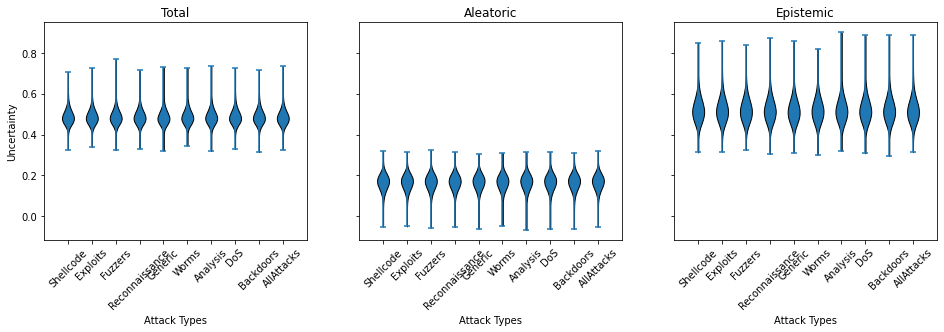

'\nplotviolin3(inidata[6],inidata[7],inidata[8])\nplotviolin3(last[6],last[7],last[8])\nplotviolin3(latent[6],latent[7],latent[8])\nplotviolin3(vae1[6],vae1[7],vae1[8])\n\nplotviolin3(vae5[6],vae5[7],vae5[8])\nplotviolin3(vae6[6],vae6[7],vae6[8])\nplotviolin3(vae7[6],vae7[7],vae7[8])\nplotviolin3(vae8[6],vae8[7],vae8[8])\n'

In [90]:

#plotviolin3(inidata[0],inidata[1],inidata[2])
plotviolin3(last[0],last[1],last[2])
#plotviolin3(latent[0],latent[1],latent[2])
#plotviolin3(vae[0],vae[1],vae[2])

'''
plotviolin3(inidata[6],inidata[7],inidata[8])
plotviolin3(last[6],last[7],last[8])
plotviolin3(latent[6],latent[7],latent[8])
plotviolin3(vae1[6],vae1[7],vae1[8])

plotviolin3(vae5[6],vae5[7],vae5[8])
plotviolin3(vae6[6],vae6[7],vae6[8])
plotviolin3(vae7[6],vae7[7],vae7[8])
plotviolin3(vae8[6],vae8[7],vae8[8])
'''
    

In [5]:
# CIC2017: dropout
# 1
inidata=get3uncer(dicplotsnpy,'BAEcic2017-drop-input-bce+alluncer.csv',datasetname='cic2017')  
last=get3uncer(dicplotsnpy, 'BAEcic2017-drop-last-bce+alluncer.csv',datasetname='cic2017')  
latent=get3uncer(dicplotsnpy,'BAEcic2017-drop-latent-mae+alluncer.csv',datasetname='cic2017')
vae=get3uncer(dicplotsnpy,'BAEcic2017-drop-vae-bce+alluncer.csv',datasetname='cic2017')




In [29]:
# CIC2017: vi
# 
inidata=get3uncer(dicplotsnpy,'BAEcic2017-vi-input-mae+alluncer.csv',datasetname='cic2017') 
last=get3uncer(dicplotsnpy, 'BAEcic2017-vi-last-bce+alluncer.csv',datasetname='cic2017')  
latent=get3uncer(dicplotsnpy,'BAEcic2017-vi-latent-mae+alluncer.csv',datasetname='cic2017')
vae=get3uncer(dicplotsnpy,'BAEcic2017-vi-vae-bce+alluncer.csv',datasetname='cic2017')


In [ ]:
#plotviolin3inOne(last[3],last[4],last[5],latent[3],latent[4],latent[5],vae[3],vae[4],vae[5])
#plotviolin3inOne(last[6],last[7],last[8],latent[6],latent[7],latent[8],vae[6],vae[7],vae[8])

plotviolin3(inidata[0],inidata[1],inidata[2])
plotviolin3(last[0],last[1],last[2])
plotviolin3(latent[0],latent[1],latent[2])
plotviolin3(vae[0],vae[1],vae[2])

In [5]:
def get3uncer(csvpath, csvname,datasetname='unsw'):
    # prepare data; csvname inclduding postfix,like .npy
    GC_t=[]
    GC_a=[]
    GC_e=[]
    orig_t, orig_a, orig_e=[],[],[]
    ECOD_t, ECOD_a, ECOD_e=[],[],[]
    Gamma_t,Gamma_a,Gamma_e=[],[],[]
    for root,dirs,files in os.walk(csvpath):
        for each in files:
            #if (csvpath+each).endswith('.csv') and 'checkpoint' not in each:     
            if each==csvname:
                pd_reader=pd.read_csv(csvpath+each,header=0 ,index_col=0, engine="python")
                for ind in range(1,2):  # len(attack_types)):
                    if datasetname=='unsw':
                        keyname=attack_types[ind]+'.npy_orig'+'_total'
                        
                        #Gamma_t.append(  pd_reader[attack_types[ind]+'.npy_Gamma'+'_total'].dropna().to_numpy() )
                        #Gamma_a.append(  pd_reader[attack_types[ind]+'.npy_Gamma'+'_alea'].dropna().to_numpy() )
                        #Gamma_e.append( pd_reader[attack_types[ind]+'.npy_Gamma'+'_epis'].dropna().to_numpy() )
                        
                        orig_t.append(pd_reader[keyname].dropna())
                        orig_a.append( pd_reader[attack_types[ind]+'.npy_orig'+'_alea'].dropna().to_numpy())
                        orig_e.append(  pd_reader[attack_types[ind]+'.npy_orig'+'_epis'].dropna().to_numpy()  )
                        GC_t.append(  pd_reader[attack_types[ind]+'.npy_GC'+'_total'].dropna().to_numpy() )
                        GC_a.append(  pd_reader[attack_types[ind]+'.npy_GC'+'_alea'].dropna().to_numpy() )
                        GC_e.append( pd_reader[attack_types[ind]+'.npy_GC'+'_epis'].dropna().to_numpy() )
                        ECOD_t.append( pd_reader[attack_types[ind]+'.npy_ECOD'+'_total'].dropna().to_numpy())
                        ECOD_a.append(  pd_reader[attack_types[ind]+'.npy_ECOD'+'_alea'].dropna().to_numpy() )
                        ECOD_e.append( pd_reader[attack_types[ind]+'.npy_ECOD'+'_epis'].dropna().to_numpy()  )
                        
                    elif datasetname=='cic2017':                        
                        keyname=attack_types[ind]+'_orig'+'_total'
                        orig_t.append(pd_reader[keyname].dropna())
                        orig_a.append( pd_reader[attack_types[ind]+'_orig'+'_alea'].dropna().to_numpy())
                        orig_e.append(  pd_reader[attack_types[ind]+'_orig'+'_epis'].dropna().to_numpy()  )
                        GC_t.append(  pd_reader[attack_types[ind]+'_GC'+'_total'].dropna().to_numpy() )
                        GC_a.append(  pd_reader[attack_types[ind]+'_GC'+'_alea'].dropna().to_numpy() )
                        GC_e.append( pd_reader[attack_types[ind]+'_GC'+'_epis'].dropna().to_numpy() )
                        ECOD_t.append( pd_reader[attack_types[ind]+'_ECOD'+'_total'].dropna().to_numpy())
                        ECOD_a.append(  pd_reader[attack_types[ind]+'_ECOD'+'_alea'].dropna().to_numpy() )
                        ECOD_e.append( pd_reader[attack_types[ind]+'_ECOD'+'_epis'].dropna().to_numpy()  )
                        
    return orig_t,orig_a,orig_e,GC_t,GC_a,GC_e,ECOD_t, ECOD_a, ECOD_e
    #return Gamma_t, Gamma_a, Gamma_e
                    

In [8]:

#from utils.metrics import *
# have not save uncertainty of Gamma
uncerdata=get3uncer(dicplotsnpy,'BAEunsw2-vi-vae-mvn-bce+alluncer-noscale.csv',datasetname='unsw') 
plot_UQ_density(uncerdata[1],uncerdata[2], 90)                


TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

# plot metric of each type

## UNSW - vi-vae

In [ ]:
'''
ECOD: 
GC:
G1:
Gamma:
'''


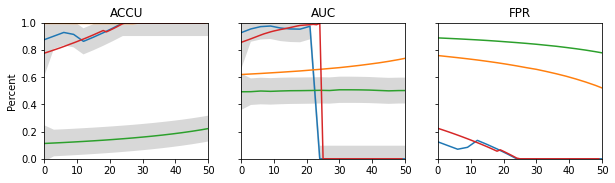

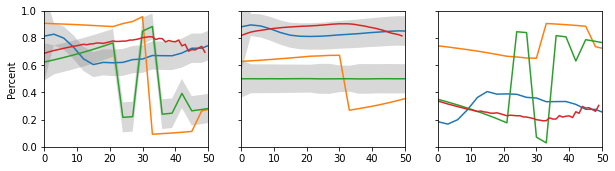

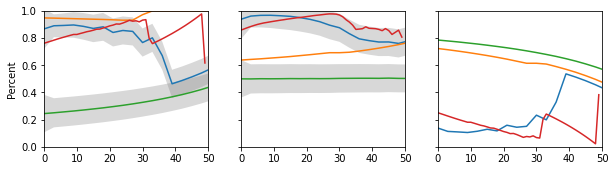

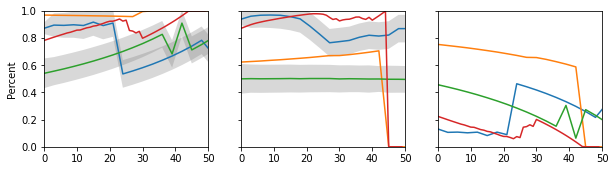

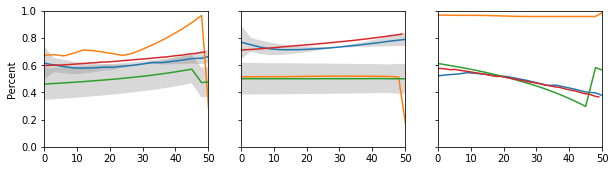

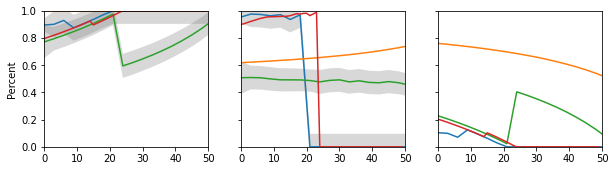

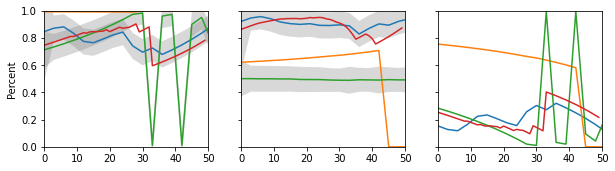

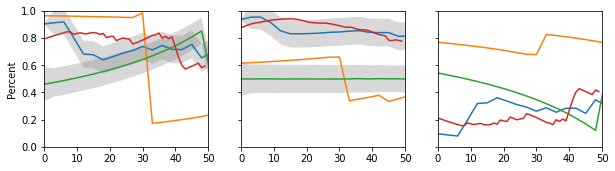

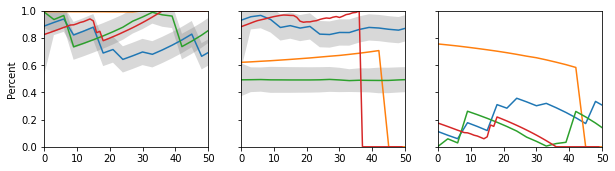

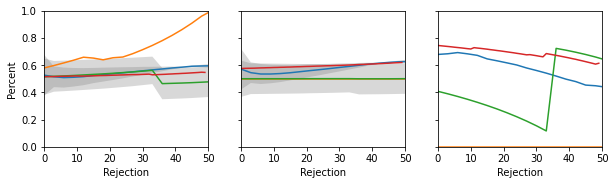

In [24]:
#savename=
pd_ECOD=pd.read_csv('../../venv/MyBayesian/plots-2/BAE+allmetrics-unsw-vi-vae-(1).csv' ) 
#pd_ECOD=pd.read_csv('../../venv/MyBayesian/plots-3/BAEunsw-vi-vae-mvn-bce+allmetrics.csv')
pd_ECOD_uncer=pd.read_csv('../../venv/MyBayesian/plots-3/BAEunsw-vi-vae-mvn-bce+allmetrics.csv')
pd_GC=pd.read_csv('../../venv/MyBayesian/plots-4/BAEunsw2-vi-vae-mvn-bce+allmetrics-nodist.csv' ) 
pd_Gamma=pd_GC
pd_G1=pd.read_csv('../../venv/MyBayesian/plots-4/BAEunsw-3-vi-vae-mvn-bce+allmetrics111.csv' ) 
#print(pd_reader.head())

modelname='UNSW-vi-vae'
for each in range(1,len( attack_types)):
    fig, (ax1, ax2, ax3) = pyplot.subplots(1,3,figsize=(10,2.5),sharey=True) 
   
    i=1
    while i<len(pd_GC):
        flag=False       
        if '+' in pd_GC.iloc[i,0] and pd_GC.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
            #print(pd_GC.iloc[i,0].split('+')[0]=='GaussianCustom')
            #print(pd_GC.iloc[i,0].split('+')[0]=='Gamma')
            if pd_GC.iloc[i,0].split('+')[0]=='GaussianCustom' or pd_GC.iloc[i,0].split('+')[0]=='Gamma' :    
                legendd=pd_GC.iloc[i,0].split('+')[0]
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_GC.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_GC.iloc[i+15,1:].astype(np.float16)

                plot_title=pd_GC.iloc[i+2,0]            
                y_values=pd_GC.iloc[i+3,1:].astype(np.float16)
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # ACCU
                y_values2=pd_GC.iloc[i+9,1:].astype(np.float16) 
                ax1.plot(xx, y_values2) # , 'tab:green')              
                ax1.fill_between(xx,y_values2-np.absolute(y_uncer)/2,y_values2+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')     
                # AUC
                ax2.plot(xx,y_values,label=legendd)                
                ax2.fill_between(xx,y_values-np.absolute(y_uncer)/2,y_values+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                                            
                # FPR
                ax3.plot(xx, pd_GC.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                
                
                if each==1:
                    ax2.set_title(plot_title)
                    ax1.set_title(pd_GC.iloc[i+8,0]) 
                    ax3.set_title(pd_GC.iloc[i+6,0])
                    #ax4.set_title(pd_reader.iloc[i+4,0])   # [i+10,0]) # macro F1 
                if each==len(attack_types)-1:
                    ax1.set(xlabel='Rejection')
                    ax2.set(xlabel='Rejection')
                    ax3.set(xlabel='Rejection')
                    #ax4.set(xlabel='Rejection')
                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1   
#############################################    plot G1    
    i=1
    while i<len(pd_G1):
        flag=False        
        if '+' in pd_G1.iloc[i,0] and pd_G1.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
            if 'Gaussian1'==pd_G1.iloc[i,0].split('+')[0]:   
                legendd='Gaussian1'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_G1.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_G1.iloc[i+15,1:].astype(np.float16)

                plot_title=pd_G1.iloc[i+2,0]            
                y_values=pd_G1.iloc[i+3,1:].astype(np.float16)
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # ACCU
                y_values2=pd_G1.iloc[i+9,1:].astype(np.float16) 
                ax1.plot(xx, y_values2) # , 'tab:green')              
                ax1.fill_between(xx,y_values2-np.absolute(y_uncer)/2,y_values2+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')     
                # AUC
                ax2.plot(xx,y_values,label=legendd)                
                ax2.fill_between(xx,y_values-np.absolute(y_uncer)/2,y_values+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                                            
                # FPR
                ax3.plot(xx, pd_G1.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1   
################################################ plot ECOD
    i=1441
    #i=1
    while i<len(pd_ECOD):
        flag=False        
        if '+' in pd_ECOD.iloc[i,0] and pd_ECOD.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
            if 'ECODLinear'==pd_ECOD.iloc[i,0].split('+')[0]:   
                legendd='ECODLinear'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_ECOD.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                
                ############ search for uncertainty
                j=1
                while j<len(pd_ECOD_uncer):
                    if '+' in pd_ECOD_uncer.iloc[j,0] and pd_ECOD_uncer.iloc[j,0].split('+')[1].split('.')[0]==attack_types[each]:
                        if 'ECODLinear'==pd_ECOD_uncer.iloc[j,0].split('+')[0]:   
                            y_uncer=pd_ECOD_uncer.iloc[j+15,1:].astype(np.float16)
                            break
                    j=j+1
                    
                #y_uncer=pd_ECOD.iloc[i+15,1:].astype(np.float16)
                
                #plot_title=pd_ECOD.iloc[i+2,0]            
                y_values=pd_ECOD.iloc[i+3,1:].astype(np.float16)
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # ACCU
                y_values2=pd_ECOD.iloc[i+9,1:].astype(np.float16)
                ax1.plot(xx, y_values2 ) # , 'tab:green')              
                #ax1.fill_between(xx,y_values2-np.absolute(y_uncer),y_values2+np.absolute(y_uncer),alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')     
                # AUC
                ax2.plot(xx,y_values,label=legendd)                
                #ax2.fill_between(xx,y_values-np.absolute(y_uncer),y_values+np.absolute(y_uncer),alpha=0.3,facecolor='grey')
                                            
                # FPR
                ax3.plot(xx, pd_ECOD.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                
        if not flag:
            i=i+1 
###################################################
    
    #handles, labels = ax2.get_legend_handles_labels()
    #fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1.15,0.4))
           
    for ax in fig.get_axes():
        ax.label_outer()
        ax.set_xlim(0,50)
        ax.set_ylim(0,1)
    
    #nowtime=datetime.datetime.now()
    #nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)    
    pyplot.savefig('plots/'+modelname+"-1031-allmetrics.png")
    
    pyplot.show()
   
                      
         

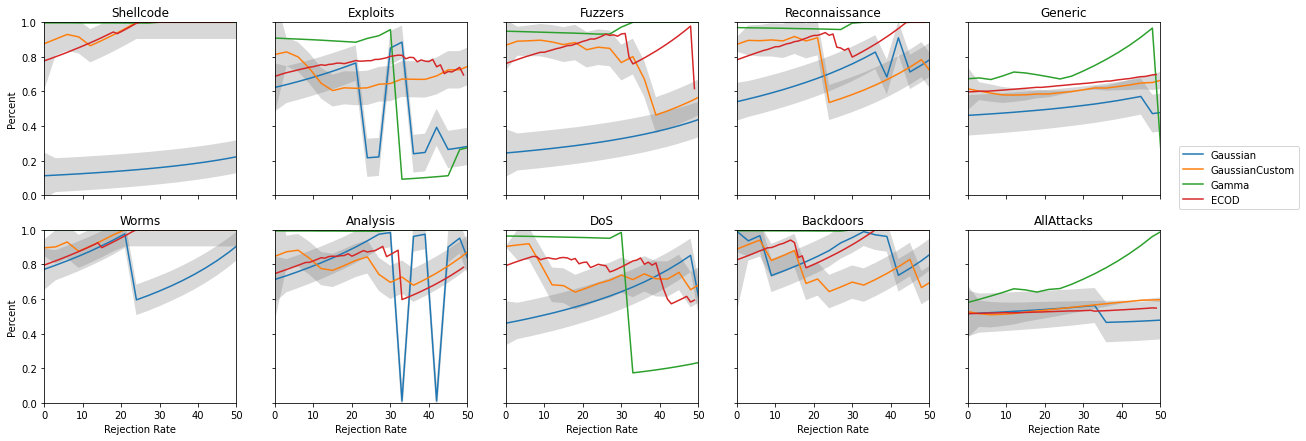

In [32]:
# plot comparision in different model of each type
fig, axes= pyplot.subplots(2, 5,figsize=(20,7),sharex=True,sharey=True) 
#fig.suptitle('Comparisons of ' ) 
#diccsv='csvsUNSW/'
for indtype in range(1,len( attack_types)): 
    axes[(indtype-1)//5,(indtype-1)%5].set_title(attack_types[indtype] )  #
    
    
    #############################################    plot G1    
    i=1
    while i<len(pd_G1):
        flag=False        
        if '+' in pd_G1.iloc[i,0] and pd_G1.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:
            if 'Gaussian1'==pd_G1.iloc[i,0].split('+')[0]:   
                legendd='Gaussian'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_G1.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_G1.iloc[i+15,1:].astype(np.float16)

                #plot_title=pd_G1.iloc[i+2,0]            
                #y_values=pd_G1.iloc[i+3,1:].astype(np.float16)  # AUC
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # ACCU
                y_values=pd_G1.iloc[i+9,1:].astype(np.float16)
                
                axes[(indtype-1)//5,(indtype-1)%5].plot(xx,y_values,label=legendd)
                axes[(indtype-1)//5,(indtype-1)%5].fill_between(xx,y_values-np.absolute(y_uncer)/2,y_values+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                
                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1  
    ################################################################
    i=1
    while i<len(pd_GC):
        flag=False       
        if '+' in pd_GC.iloc[i,0] and pd_GC.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:
            #print(pd_GC.iloc[i,0].split('+')[0]=='GaussianCustom')
            #print(pd_GC.iloc[i,0].split('+')[0]=='Gamma')
            if pd_GC.iloc[i,0].split('+')[0]=='GaussianCustom' or pd_GC.iloc[i,0].split('+')[0]=='Gamma' :    
                legendd=pd_GC.iloc[i,0].split('+')[0]
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_GC.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_GC.iloc[i+15,1:].astype(np.float16)

                #plot_title=pd_GC.iloc[i+2,0]            
                #y_values=pd_GC.iloc[i+3,1:].astype(np.float16)
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # ACCU
                y_values=pd_GC.iloc[i+9,1:].astype(np.float16)
                
                axes[(indtype-1)//5,(indtype-1)%5].plot(xx,y_values,label=legendd)
                axes[(indtype-1)//5,(indtype-1)%5].fill_between(xx,y_values-np.absolute(y_uncer)/2,y_values+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                
                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1   

            
################################################ plot ECOD
    i=1441
    #i=1
    while i<len(pd_ECOD):
        flag=False        
        if '+' in pd_ECOD.iloc[i,0] and pd_ECOD.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:
            if 'ECODLinear'==pd_ECOD.iloc[i,0].split('+')[0]:   
                legendd='ECOD'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_ECOD.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                
                ############ search for uncertainty
                j=1
                while j<len(pd_ECOD_uncer):
                    if '+' in pd_ECOD_uncer.iloc[j,0] and pd_ECOD_uncer.iloc[j,0].split('+')[1].split('.')[0]==attack_types[each]:
                        if 'ECODLinear'==pd_ECOD_uncer.iloc[j,0].split('+')[0]:   
                            y_uncer=pd_ECOD_uncer.iloc[j+15,1:].astype(np.float16)
                            break
                    j=j+1
                #y_uncer[30:]=0   
                #y_uncer=pd_ECOD.iloc[i+15,1:].astype(np.float16)
                ##############################################################
                #plot_title=pd_ECOD.iloc[i+2,0]            
                #y_values=pd_ECOD.iloc[i+3,1:].astype(np.float16)   # AUC
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # ACCU
                y_values=pd_ECOD.iloc[i+9,1:].astype(np.float16)                
                
                axes[(indtype-1)//5,(indtype-1)%5].plot(xx,y_values,label=legendd)
                #axes[(indtype-1)//5,(indtype-1)%5].fill_between(xx,y_values-np.absolute(y_uncer),y_values+np.absolute(y_uncer),alpha=0.3,facecolor='grey')
                if indtype==1 or indtype==6:
                    axes[(indtype-1)//5,(indtype-1)%5].set(ylabel='Percent')
                if indtype>5:
                    axes[(indtype-1)//5,(indtype-1)%5].set(xlabel='Rejection Rate')
        if not flag:
            i=i+1 
            
handles, labels = axes[0,2].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1,0.5))

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlim(0,50)
    ax.set_ylim(0,1)

#nowtime=datetime.datetime.now()
#nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)
pyplot.savefig('plots/'+"unsw-allprobs.png")
pyplot.show()

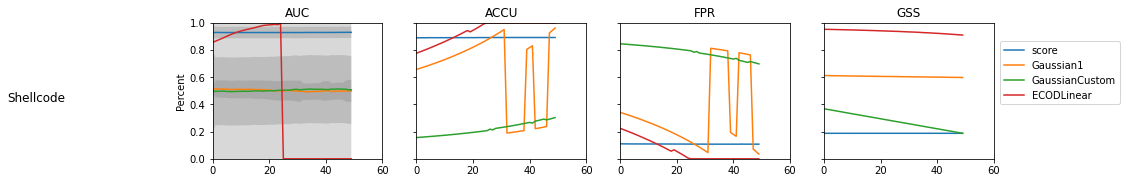

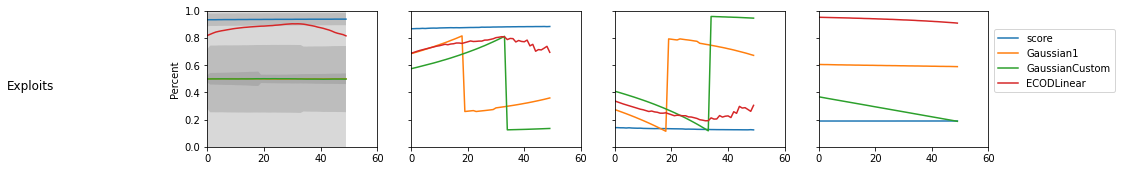

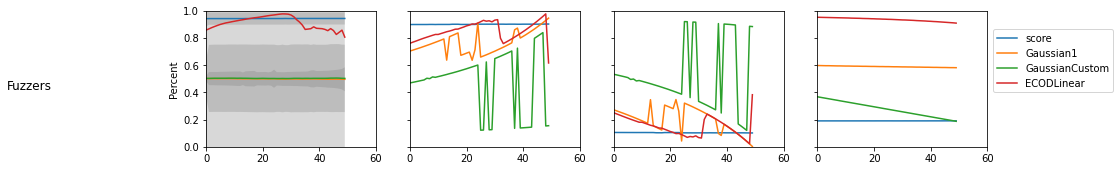

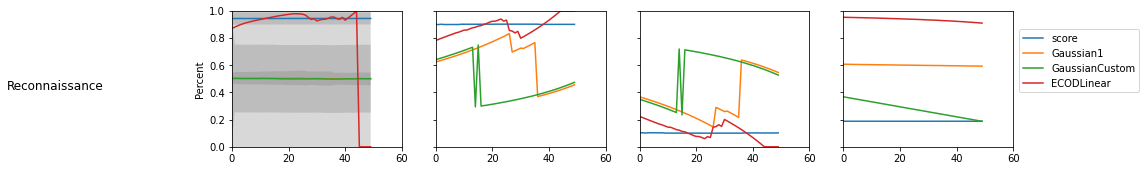

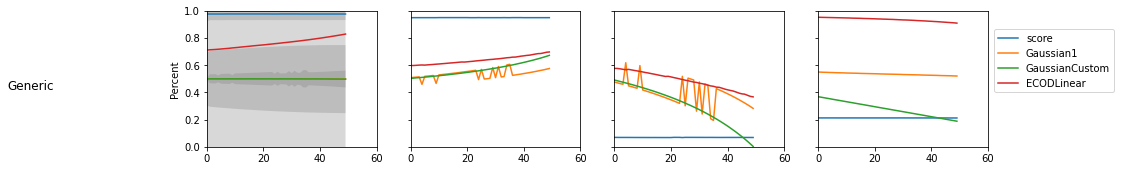

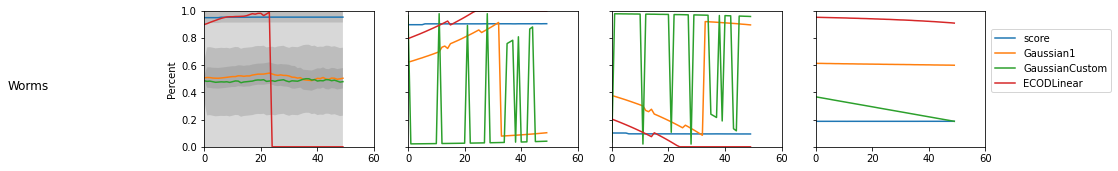

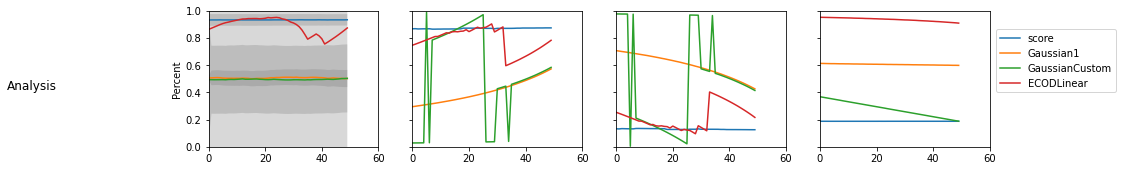

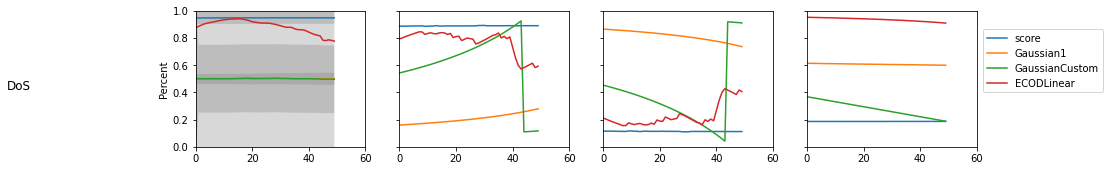

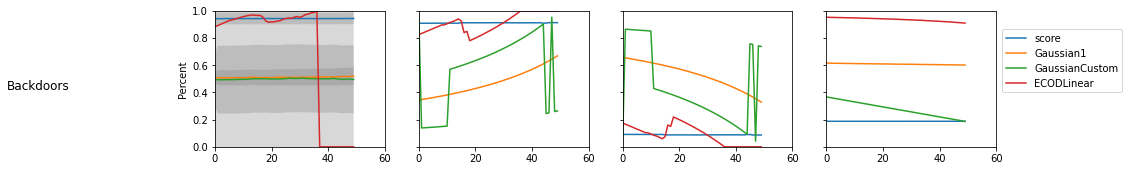

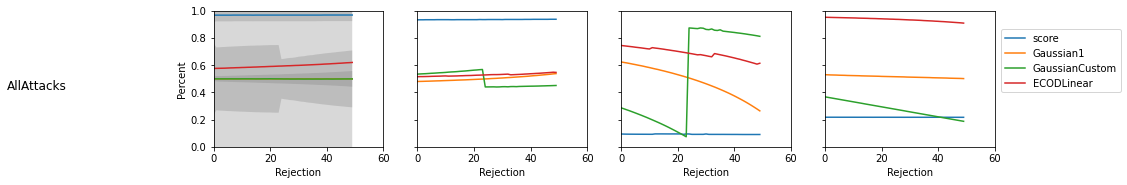

NameError: name 'model_dict_total' is not defined

In [8]:
# under 3+1 , calculate total of each
savename='test'
#pd_reader=pd.read_csv('../../venv/MyBayesian/plots/BAE'+'allmetrics.csv' )  
pd_reader=pd.read_csv('../../venv/MyBayesian/plots-2/BAE+allmetrics-unsw-vi-vae-(1).csv' ) 
                     
#print(pd_reader.head())

# plot comparision in different phase of each type
total_auc=0 # average of the largest AUC of each types
modelname='BAE MCdropout'
tw_auc,tw_accu=0,0
model_dict={}
model_dict["metricname"]=pd_reader.iloc[17,1:19]
for each in range(1,len( attack_types)):
    fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(1,4,figsize=(14,2.5),sharey=True) 
    fig.suptitle(attack_types[each] ,x=-0.05,y=0.5) # {typename} {modelname}')
    best_auc=0
    w_auc=0  #average
    w_accu=0  # average
    #for i in range(0,len(pd_reader)):
    i=1441
    while i<len(pd_reader):
        flag=False        
        if '+' in pd_reader.iloc[i,0] :
            if pd_reader.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
                legendd=pd_reader.iloc[i,0].split('+')[0]
                if legendd in model_dict.keys():
                    model_dict[legendd]=model_dict[legendd]+pd_reader.iloc[i+17,1:19].astype(np.float16)                    
                else: 
                    model_dict[legendd]=pd_reader.iloc[i+17,1:19].astype(np.float16) 
                    
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_reader.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_reader.iloc[i+15,1:].astype(np.float16)

                plot_title=pd_reader.iloc[i+2,0]            
                y_values=pd_reader.iloc[i+3,1:].astype(np.float16)
                ''' 
                if best_auc<  np.max(y_values):
                    best_auc=np.max(y_values)
                if w_auc<float(pd_reader.iloc[i+17,2]):
                    w_auc=float( pd_reader.iloc[i+17,2])
                    # print(f'the better weight_auc {w_auc}is belongs: {attack_types[each]}{legendd}')
                if w_accu<float(pd_reader.iloc[i+17,3]):
                    w_accu=float(pd_reader.iloc[i+17,3])
                    #print(f'the better weight_accu {w_accu}is belongs: {attack_types[each]}{legendd}')
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # AUC
                ax1.plot(xx,y_values,label=legendd)                
                ax1.fill_between(xx,y_values-np.absolute(y_uncer),y_values+np.absolute(y_uncer),alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')              
                # ACCU
                ax2.plot(xx, pd_reader.iloc[i+9,1:].astype(np.float16) ) # , 'tab:green')                
                # FPR
                ax3.plot(xx, pd_reader.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                
                # Macro F1
                #ax4.plot(xx, pd_reader.iloc[i+11,1:].astype(np.float16) ) # , 'tab:red')               
                
                ax4.plot(xx, pd_reader.iloc[i+5,1:].astype(np.float16) ) # , 'tab:red')   # accu2 follow AUC            
                
                if each==1:
                    ax1.set_title(plot_title)
                    ax2.set_title(pd_reader.iloc[i+8,0]) 
                    ax3.set_title(pd_reader.iloc[i+6,0])
                    ax4.set_title(pd_reader.iloc[i+4,0])   # [i+10,0]) # macro F1 
                if each==len(attack_types)-1:
                    ax1.set(xlabel='Rejection')
                    ax2.set(xlabel='Rejection')
                    ax3.set(xlabel='Rejection')
                    ax4.set(xlabel='Rejection')
                '''
                # F1
                ax6.plot(xx,pd_reader.iloc[i+13,1:].astype(np.float16) ) # , 'tab:purple')
                ax6.set_title(pd_reader.iloc[i+12,0])
                #ax6.set(xlabel='Rejection')
                 #GSS
                ax2.plot(xx,pd_reader.iloc[i+5,1:].astype(np.float16),label=legendd)  #
                ax2.set_title(pd_reader.iloc[i+4,0])
                #ax2.fill_between(xx,gsslist-unlist,gsslist+unlist,alpha=0.3,facecolor='grey')
                
                if legendd=='GaussianCustom':
                    i=i+18*3 
                    flag=True
                elif legendd=='ECODLinear':
                    i=i+18
                    flag=True
                '''                      
                i=i+18
                flag=True
        if not flag:
            i=i+1                   
   
    
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1.03,0.4))
           
    for ax in fig.get_axes():
        ax.label_outer()
        ax.set_xlim(0,60)
        ax.set_ylim(0,1)
    '''
    total_auc=(total_auc+best_auc  ) /2
    tw_auc=(tw_auc+w_auc)/2
    tw_accu=(tw_accu+w_accu)/2
    
    nowtime=datetime.datetime.now()
    nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)    
    pyplot.savefig('plots/'+modelname+'+'+nowtime+'+'+"allmetrics.png")
    '''
    pyplot.show()
   
for aproblegend in model_dict_total.keys():
    if aproblegend != 'metricname':
        model_dict[aproblegend]=model_dict[aproblegend]/(len(attack_types)-1)
                      
#model_dict['Gaussian1']=model_dict['Gaussian1']/(len(attack_types)-1)
#model_dict['GaussianCustom']=model_dict['GaussianCustom']/(len(attack_types)-1)
#model_dict['ECODLinear']=model_dict['ECODLinear']/(len(attack_types)-1)
         
#print(f'the AUC of this model is {total_auc}')
save_path = "plots/"+'allmetrics+'+savename+".csv"
#final_AUC={'total_AUC':total_auc, 'weight_AUC:':tw_auc,'weight_Accu:':tw_accu}
#save_data = pd.DataFrame.from_dict([final_AUC])
#save_data.to_csv(save_path, mode='a', header=True, index_label=modelname,index=True)

save_data=pd.DataFrame(model_dict)
save_data.to_csv(save_path, mode='a', header=True, index_label=modelname,index=True)

## CIC2017-vi-vae

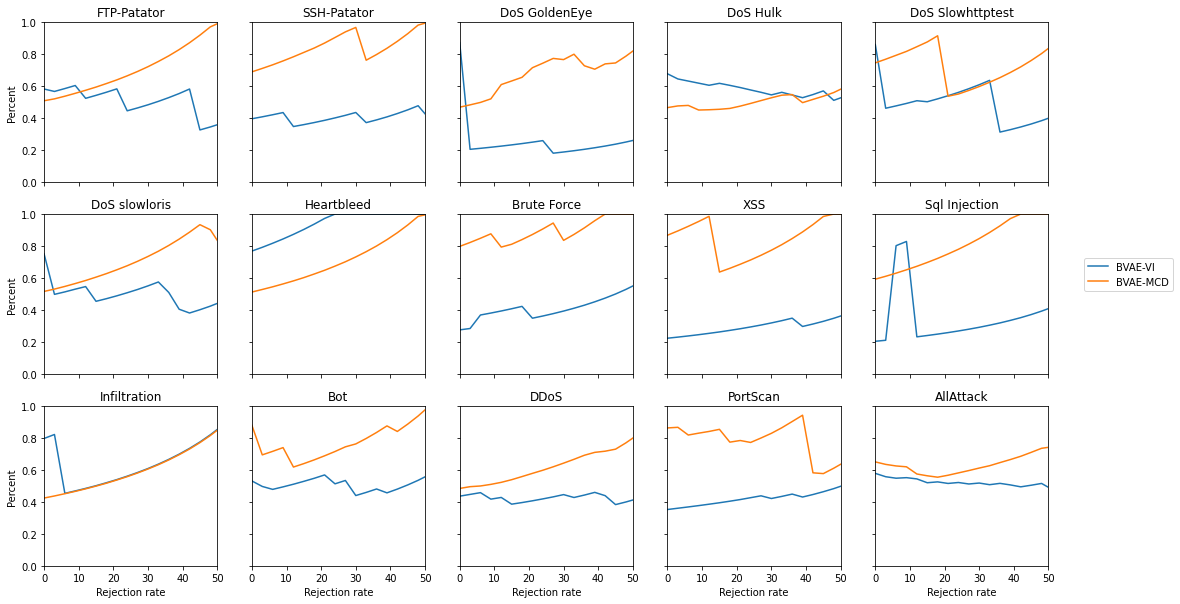

In [21]:
# plot comparision in different model of each type
fig, axes= pyplot.subplots(3, 5,figsize=(18,10),sharex=True,sharey=True) 
#fig.suptitle('Comparisons of Models' ) 
diccsv='csvs/'
for indtype in range(1,len( attack_types)): 
    axes[(indtype-1)//5,(indtype-1)%5].set_title(attack_types2[indtype] )
    
    for root,dirs,files in os.walk(diccsv):
        for each in files:
            if each.endswith('.csv') and each.split('-')[-1]!='checkpoint.csv' : 
                thislabel='??'
                if 'vi' in each:   # .split('+')[0]:
                    thislabel='BVAE-VI'
                elif 'drop' in each:   # .split('+')[0]:
                    thislabel='BVAE-MCD'
                
                #thislabel=each.split('+')[1]
                pd_reader=pd.read_csv(diccsv+each)
                init=0
                
                probname='ECODLinear'  # 'GaussianCustom' # 'Gaussian1'#  
                
                if each=='BAEcic2017-3-vi-vae-norm-Tril-bce+allmetrics-forGC-no.csv':  
                    probname='GaussianCustom'
                if each=='BAEcic2017-3-vi-vae-mvnTril-bce+allmetrics555-forAUC.csv':
                    probname='Gaussian1'
                 
                for i in range(init,len(pd_reader)): # show the first group results in csv
                    if '+' in pd_reader.iloc[i,0]:
                        if pd_reader.iloc[i,0].split('+')[1]==attack_types[indtype] and pd_reader.iloc[i,0].split('+')[0]==probname :  #  'GaussianCustom' : #'ECODLinear': # 
                           
                            xx=pd_reader.iloc[i+2,1:].astype(int)
                            y_uncer=pd_reader.iloc[i+15,1:].astype(np.float16)
                            #plot_title=pd_reader.iloc[i+2,0]            
                            #y_values=pd_reader.iloc[i+3,1:].astype(np.float16)  # AUC

                            y_values=pd_reader.iloc[i+9,1:].astype(np.float16)  # Accu
                            
                            axes[(indtype-1)//5,(indtype-1)%5].plot(xx,y_values,label=thislabel)
                            #ax1.fill_between(xx,y_values-y_uncer,y_values+y_uncer,alpha=0.3,facecolor='grey')
                            #ax1.set(ylabel='Percent')
                            if (indtype-1)%5==0:
                                axes[(indtype-1)//5,(indtype-1)%5].set(ylabel='Percent')
                            if indtype>10:
                                axes[(indtype-1)//5,(indtype-1)%5].set(xlabel='Rejection rate')
                        
                            break
                            #i=i+18  
handles, labels = axes[0,2].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1,0.5))

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlim(0,50)
    ax.set_ylim(0,1)

#nowtime=datetime.datetime.now()
#nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)
pyplot.savefig('csvs/comparison-cic2017+'+"allmodels.png")
pyplot.show()

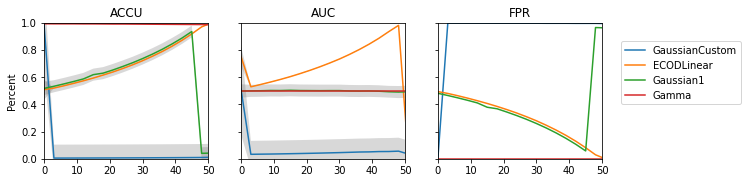

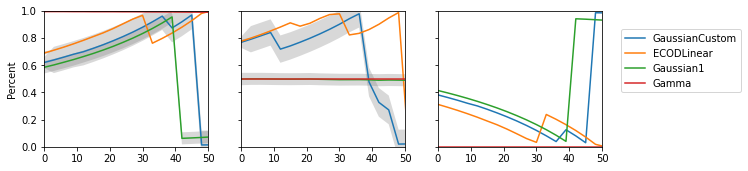

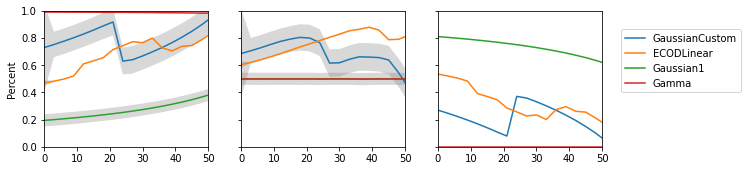

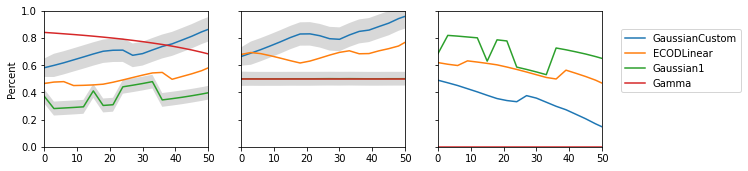

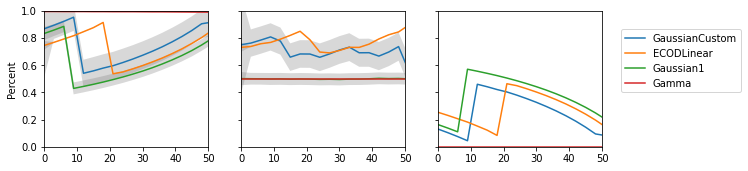

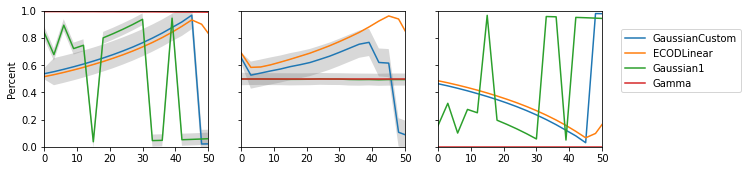

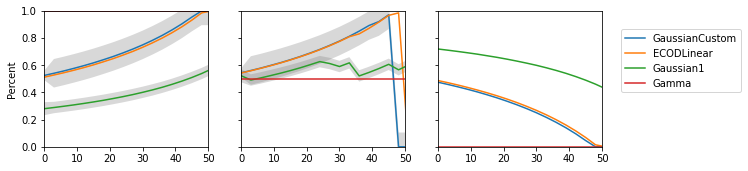

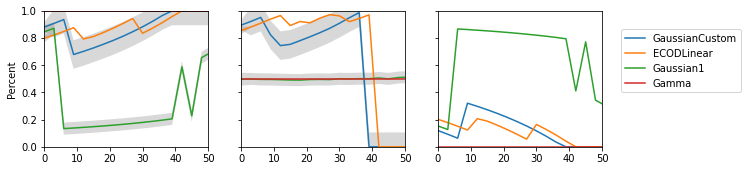

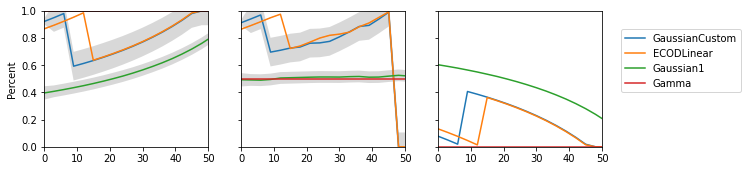

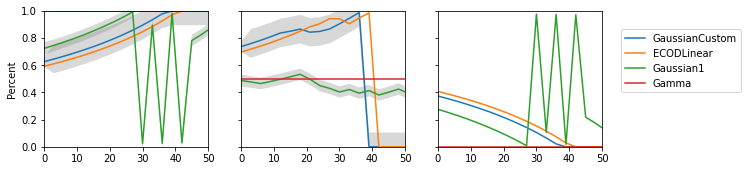

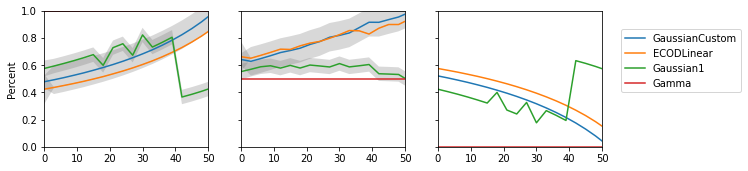

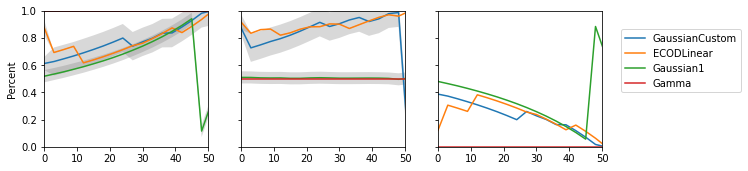

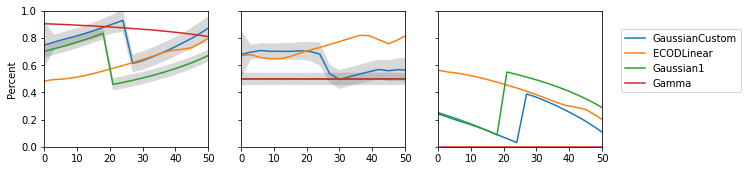

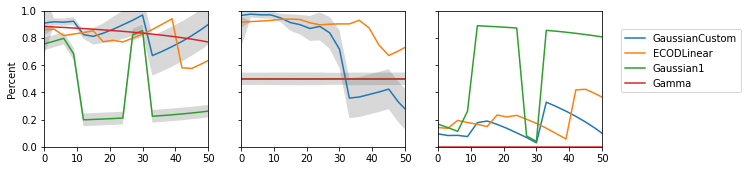

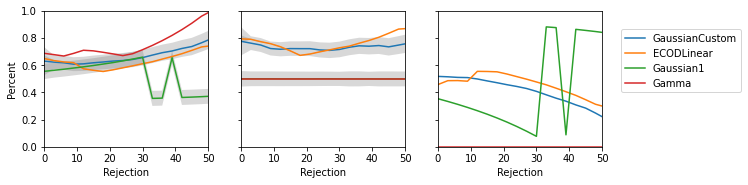

In [12]:
#savename='cic2017-vi-last-bce'
pd_ECOD=pd.read_csv('../../venv/MyBayesian/plots-4/BAEcic2017-3-drop-vae-Tril-bce+allmetrics444.csv' ) 
#pd_ECOD_uncer=pd.read_csv('../../venv/MyBayesian/plots-3/BAEunsw-vi-vae-mvn-bce+allmetrics.csv')
#pd_GC=pd_ECOD 
pd_GC=pd.read_csv('../../venv/MyBayesian/plots-4/BAEcic2017-3-drop-vae-Tril-bce+allmetrics666.csv' ) 
pd_Gamma=pd.read_csv('../../venv/MyBayesian/plots-4/BAEcic2017-3-drop-vae-Tril-bce+allmetrics555.csv' ) 
pd_G1=pd.read_csv('../../venv/MyBayesian/plots-4/BAEcic2017-3-drop-vae-Tril-bce+allmetrics666.csv' ) 
#print(pd_reader.head())


modelname='cic2017-drop-vae'
for each in range(1,len( attack_types)):
    fig, (ax1, ax2, ax3) = pyplot.subplots(1,3,figsize=(10,2.5),sharey=True) 
    #fig.suptitle(attack_types[each] ,x=-0.05,y=0.5) 
    #for i in range(0,len(pd_reader)):
    ####### plot GC
    i=1
    while i<len(pd_GC):
        flag=False       
        if '+' in pd_GC.iloc[i,0] and pd_GC.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
            #print(pd_GC.iloc[i,0].split('+')[0]=='GaussianCustom')
            #print(pd_GC.iloc[i,0].split('+')[0]=='Gamma')
            if pd_GC.iloc[i,0].split('+')[0]=='GaussianCustom' or pd_GC.iloc[i,0].split('+')[0]=='ECODLinear':    
                legendd=pd_GC.iloc[i,0].split('+')[0]
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_GC.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_GC.iloc[i+15,1:].astype(np.float16)

                plot_title=pd_GC.iloc[i+2,0]            
                y_values=pd_GC.iloc[i+3,1:].astype(np.float16)
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # ACCU
                y_values2=pd_GC.iloc[i+9,1:].astype(np.float16) 
                ax1.plot(xx, y_values2) # , 'tab:green')              
                ax1.fill_between(xx,y_values2-np.absolute(y_uncer)/2,y_values2+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')     
                # AUC
                ax2.plot(xx,y_values,label=legendd)                
                ax2.fill_between(xx,y_values-np.absolute(y_uncer)/2,y_values+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                                            
                # FPR
                ax3.plot(xx, pd_GC.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                
                # Macro F1
                ##ax4.plot(xx, pd_reader.iloc[i+11,1:].astype(np.float16) ) # , 'tab:red') 
                #ax4.plot(xx, pd_reader.iloc[i+5,1:].astype(np.float16) ) # , 'tab:red')   # accu2 follow AUC            
                
                if each==1:
                    ax2.set_title(plot_title)
                    ax1.set_title(pd_GC.iloc[i+8,0]) 
                    ax3.set_title(pd_GC.iloc[i+6,0])
                    #ax4.set_title(pd_reader.iloc[i+4,0])   # [i+10,0]) # macro F1 
                if each==len(attack_types)-1:
                    ax1.set(xlabel='Rejection')
                    ax2.set(xlabel='Rejection')
                    ax3.set(xlabel='Rejection')
                    #ax4.set(xlabel='Rejection')
                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1   
#############################################    plot G1    
    i=1
    while i<len(pd_G1):
        flag=False        
        if '+' in pd_G1.iloc[i,0] and pd_G1.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
            if 'Gaussian1'==pd_G1.iloc[i,0].split('+')[0]:   
                legendd='Gaussian1'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_G1.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_G1.iloc[i+15,1:].astype(np.float16)

                plot_title=pd_G1.iloc[i+2,0]            
                y_values=pd_G1.iloc[i+3,1:].astype(np.float16)
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # ACCU
                y_values2=pd_G1.iloc[i+9,1:].astype(np.float16) 
                ax1.plot(xx, y_values2) # , 'tab:green')              
                ax1.fill_between(xx,y_values2-np.absolute(y_uncer)/2,y_values2+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')     
                # AUC
                ax2.plot(xx,y_values,label=legendd)                
                ax2.fill_between(xx,y_values-np.absolute(y_uncer)/2,y_values+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                                            
                # FPR
                ax3.plot(xx, pd_G1.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1   
################################################ plot ECOD
    i=1
    while i<len(pd_Gamma):
        flag=False        
        if '+' in pd_Gamma.iloc[i,0] and pd_Gamma.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
            if 'Gamma'==pd_Gamma.iloc[i,0].split('+')[0]:   
                legendd='Gamma'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_Gamma.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                
               
                y_uncer=pd_Gamma.iloc[i+15,1:].astype(np.float16)
                           
                y_values=pd_Gamma.iloc[i+3,1:].astype(np.float16)
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # ACCU
                y_values2=pd_Gamma.iloc[i+9,1:].astype(np.float16)
                ax1.plot(xx, y_values2 ) # , 'tab:green')              
                #ax1.fill_between(xx,y_values2-np.absolute(y_uncer),y_values2+np.absolute(y_uncer),alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')     
                # AUC
                ax2.plot(xx,y_values,label=legendd)                
                #ax2.fill_between(xx,y_values-np.absolute(y_uncer),y_values+np.absolute(y_uncer),alpha=0.3,facecolor='grey')
                                            
                # FPR
                ax3.plot(xx, pd_Gamma.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                       
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1 
###################################################
    
    handles, labels = ax2.get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1.1,0.4))
           
    for ax in fig.get_axes():
        ax.label_outer()
        ax.set_xlim(0,50)
        ax.set_ylim(0,1)
    
    #nowtime=datetime.datetime.now()
    #nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)    
    #pyplot.savefig('plots/'+modelname+"-1031-allmetrics.png")
    
    pyplot.show()
   
                      
         

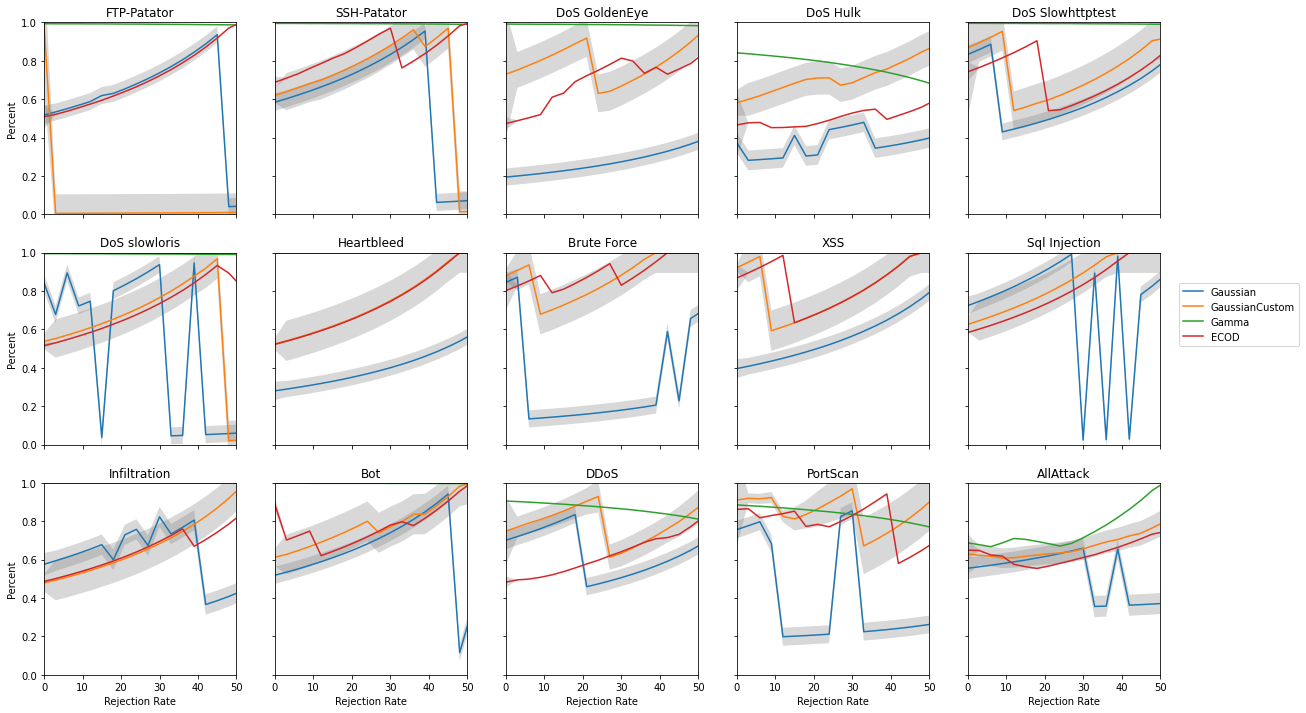

In [16]:
# plot comparision in different model of each type
fig, axes= pyplot.subplots(3, 5,figsize=(20,12),sharex=True,sharey=True) 
#fig.suptitle('Comparisons of ' ) 
#diccsv='csvsUNSW/'
for indtype in range(1,len( attack_types)): 
    axes[(indtype-1)//5,(indtype-1)%5].set_title(attack_types2[indtype] )  #
    #############################################    plot G1    
    i=1
    while i<len(pd_G1):
        flag=False        
        if '+' in pd_G1.iloc[i,0] and pd_G1.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:
            if 'Gaussian1'==pd_G1.iloc[i,0].split('+')[0]:   
                legendd='Gaussian'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_G1.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_G1.iloc[i+15,1:].astype(np.float16)

                #plot_title=pd_G1.iloc[i+2,0]            
                #y_values=pd_G1.iloc[i+3,1:].astype(np.float16)  # AUC
                 # ACCU
                y_values=pd_G1.iloc[i+9,1:].astype(np.float16)
                
                yyy=y_values
                xxx=xx
                part_uncer=y_uncer
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:(ind-1)]                        
                        xxx=xx[:(ind-1)]
                        part_uncer=y_uncer[:(ind-1)]
                        break
                        '''
                axes[(indtype-1)//5,(indtype-1)%5].plot(xxx,yyy,label=legendd)
                axes[(indtype-1)//5,(indtype-1)%5].fill_between(xxx,yyy-np.absolute(part_uncer)/2,yyy+np.absolute(part_uncer)/2,alpha=0.3,facecolor='grey')
                axes[(indtype-1)//5,0].set(ylabel='Percent')                         
               
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1  
    ################################################### GC
    i=1
    while i<len(pd_GC):
        flag=False       
        if '+' in pd_GC.iloc[i,0] and pd_GC.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:
            if pd_GC.iloc[i,0].split('+')[0]=='GaussianCustom' :    
                legendd=pd_GC.iloc[i,0].split('+')[0]
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_GC.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_GC.iloc[i+15,1:].astype(np.float16)

                #plot_title=pd_GC.iloc[i+2,0]            
                #y_values=pd_GC.iloc[i+3,1:].astype(np.float16)  #auc
                        
                # ACCU
                y_values=pd_GC.iloc[i+9,1:].astype(np.float16)
                yyy=y_values
                xxx=xx
                part_uncer=y_uncer
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:(ind-1)]                        
                        xxx=xx[:(ind-1)]
                        part_uncer=y_uncer[:(ind-1)]
                        break
                        '''
                axes[(indtype-1)//5,(indtype-1)%5].plot(xxx,yyy,label=legendd)
                axes[(indtype-1)//5,(indtype-1)%5].fill_between(xxx,yyy-np.absolute(part_uncer)/2,yyy+np.absolute(part_uncer)/2,alpha=0.3,facecolor='grey')
                
                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1   
 
 ################################################ plot Gamma
    i=1
    while i<len(pd_Gamma):
        flag=False        
        if '+' in pd_Gamma.iloc[i,0] and pd_Gamma.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:
            if 'Gamma'==pd_Gamma.iloc[i,0].split('+')[0]:   
                legendd='Gamma'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_Gamma.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                
                y_uncer=pd_Gamma.iloc[i+15,1:].astype(np.float16)
                #plot_title=pd_ECOD.iloc[i+2,0]            
                #y_values=pd_Gamma.iloc[i+3,1:].astype(np.float16)   # AUC
                                          
                # ACCU
                y_values=pd_Gamma.iloc[i+9,1:].astype(np.float16)            
                yyy=y_values
                xxx=xx
                part_uncer=y_uncer
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:(ind-1)]                        
                        xxx=xx[:(ind-1)]
                        part_uncer=y_uncer[:(ind-1)]
                        break
                        '''
                axes[(indtype-1)//5,(indtype-1)%5].plot(xxx,yyy,label=legendd)
                axes[(indtype-1)//5,(indtype-1)%5].fill_between(xxx,yyy-np.absolute(part_uncer)/2,yyy+np.absolute(part_uncer)/2,alpha=0.3,facecolor='grey')
             
                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1 
        
    ################################################### GC
    i=1
    while i<len(pd_ECOD):
        flag=False       
        if '+' in pd_ECOD.iloc[i,0] and pd_ECOD.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:
            if pd_ECOD.iloc[i,0].split('+')[0]=='ECODLinear' :    
                legendd='ECOD' # pd_GC.iloc[i,0].split('+')[0]
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_ECOD.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_ECOD.iloc[i+15,1:].astype(np.float16)

                #plot_title=pd_ECOD.iloc[i+2,0]            
                #y_values=pd_ECOD.iloc[i+3,1:].astype(np.float16)   #auc
                                        
                # ACCU
                y_values=pd_ECOD.iloc[i+9,1:].astype(np.float16)
                yyy=y_values
                xxx=xx
                part_uncer=y_uncer
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:(ind-1)]                        
                        xxx=xx[:(ind-1)]
                        part_uncer=y_uncer[:(ind-1)]
                        break
                        '''
                axes[(indtype-1)//5,(indtype-1)%5].plot(xxx,yyy,label=legendd)
                axes[(indtype-1)//5,(indtype-1)%5].fill_between(xxx,yyy-np.absolute(part_uncer)/2,yyy+np.absolute(part_uncer)/2,alpha=0.3,facecolor='grey')
                axes[(indtype-1)//5,0].set(ylabel='Percent') 
                if indtype>5:
                    axes[(indtype-1)//5,(indtype-1)%5].set(xlabel='Rejection Rate')
                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1   
            
handles, labels = axes[0,2].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1,0.5))

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlim(0,50)
    ax.set_ylim(0,1)

#nowtime=datetime.datetime.now()
#nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)
pyplot.savefig('plots/'+"cic-allprobs.png")
pyplot.show()

In [4]:
def getGainOf3Alea(filenamelist,gainindex=8,metric='ECODLinear',gain=7):   #  ECODLinear   GaussianCustom  # Gamma # Gaussian1        
    allfilegain=[]
    for filename in filenamelist:
        filegain=[]
        gainstotal=[]
        gainsalea=[]
        gainsepis=[]
        gainindex=gain  # 6 ,7,8,9   # 6:gainavgaccu of avgaccu2    7:gainavgauc of avgauc    8:gainaccu of waccu    9:gainauc of wauc
        pd_reader=pd.read_csv(filename,header=0 ,index_col=1)
        for each in range(1,len( attack_types)):
            i=1
            while i<len(pd_reader):
                if '+' in pd_reader.iloc[i,0] :  
                    if pd_reader.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each] and pd_reader.iloc[i,0].split('+')[0] ==metric :
                        gainstotal.append(float( pd_reader.iloc[17+i,gainindex] ))                  
                        gainsalea.append( float(pd_reader.iloc[17+i+18,gainindex] )) 
                        gainsepis.append(float(pd_reader.iloc[17+i+18+18,gainindex]) )
                        i=i+18*3
                        continue
                i+=1
        filegain.append(gainstotal)
        filegain.append(gainsalea)
        filegain.append(gainsepis)
        allfilegain.append(filegain)
        
    return allfilegain
        